In [41]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess

plt.style.use('ggplot')

# 1 proti 1

In [42]:
def read1_1(filename):
    with open(f'{filename}.transportB') as file:
        vels1 = []
        pos1 = []
        vels2 = []
        pos2 = []
        line = file.readline()
        while line != '':
            line = line.strip().split()
            if len(line) > 1:
                tmp = line[1].strip().split(',')
                if len(tmp) > 1:
                    vels1.append(float(tmp[1]))
                    pos1.append(float(tmp[2]))

            line = file.readline().strip().split()
            if len(line) > 1:
                tmp = line[1].strip().split(',')
                if len(tmp) > 1:
                    vels2.append(float(tmp[1]))
                    pos2.append(float(tmp[2]))

            line = file.readline()
            
        return vels1, pos1, vels2, pos2

In [45]:
def plot1_1(file, vels1, pos1, vels2, pos2):
    fig, ax = plt.subplots(2, 2, figsize=(10, 5))
    fig.suptitle(file)

    ax[0, 0].grid(True)
    ax[0, 0].plot(pos1, vels1)
    ax[0, 0].set_xlabel('distance [m]')
    ax[0, 0].set_ylabel('speed [m/s]')
    ax[0, 0].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[0, 0].set_title('B')

    ax[0, 1].grid(True)
    ax[0, 1].plot(pos2, vels2)
    ax[0, 1].set_xlabel('distance [m]')
    ax[0, 1].set_ylabel('speed [m/s]')
    ax[0, 1].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[0, 1].set_title('L')

    ax[1, 0].grid(True)
    ax[1, 0].plot(vels1)
    ax[1, 0].set_xlabel('time [s]')
    ax[1, 0].set_ylabel('speed [m/s]')
    ax[1, 0].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[1, 0].set_title('B')


    ax[1, 1].grid(True)
    ax[1, 1].plot(vels2)
    ax[1, 1].set_xlabel('time [s]')
    ax[1, 1].set_ylabel('speed [m/s]')
    ax[1, 1].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[1, 1].set_title('L')

    plt.show()

Param file [log/analysis/1dyn-1static/] : Starting 1 iterations ... |  ... Finished


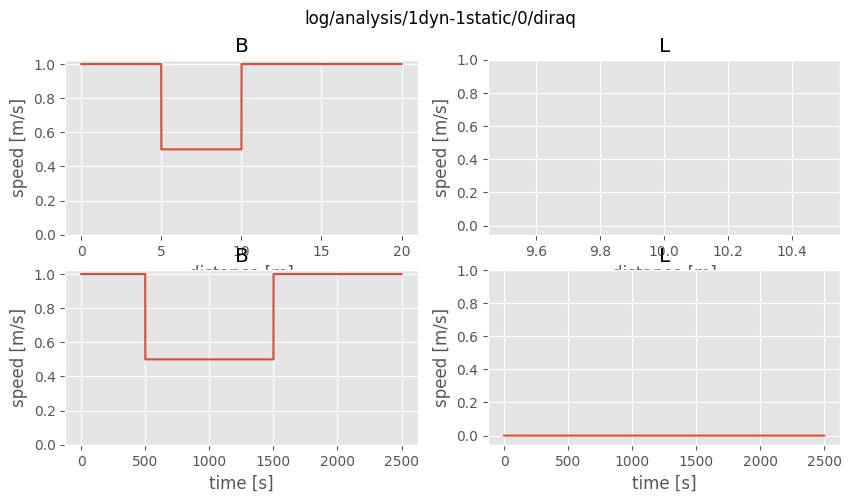

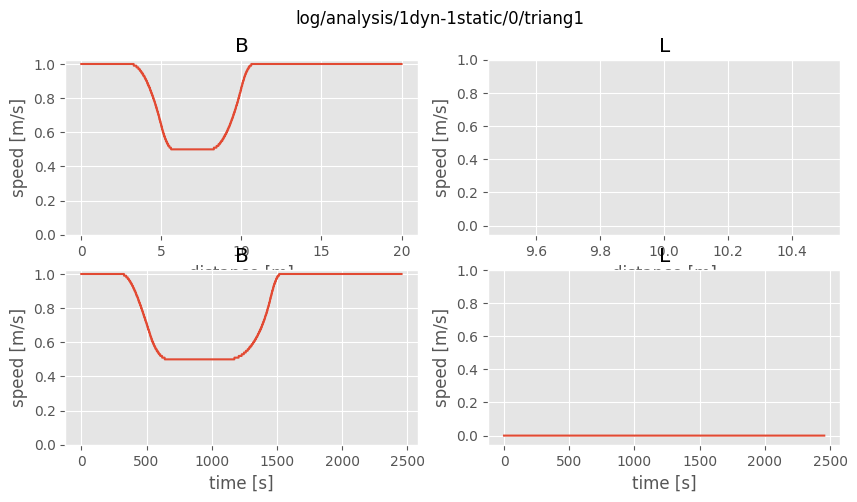

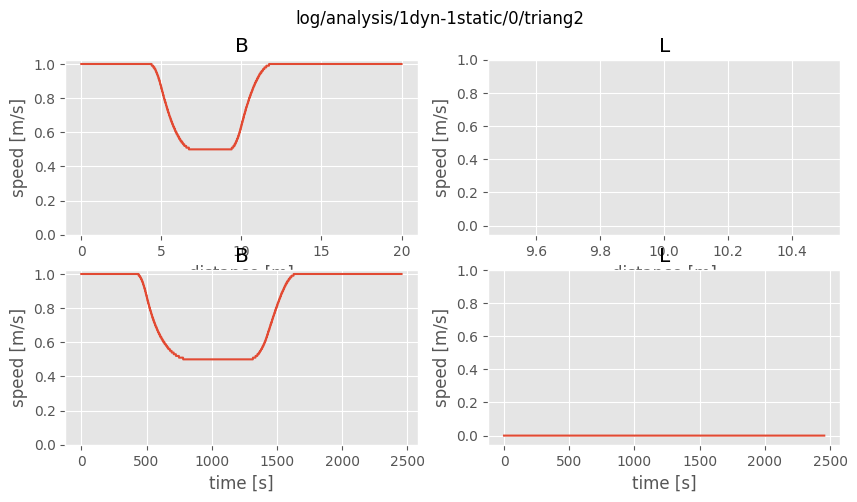

Param file [log/analysis/1static-1dyn/] : Starting 1 iterations ... |  ... Finished


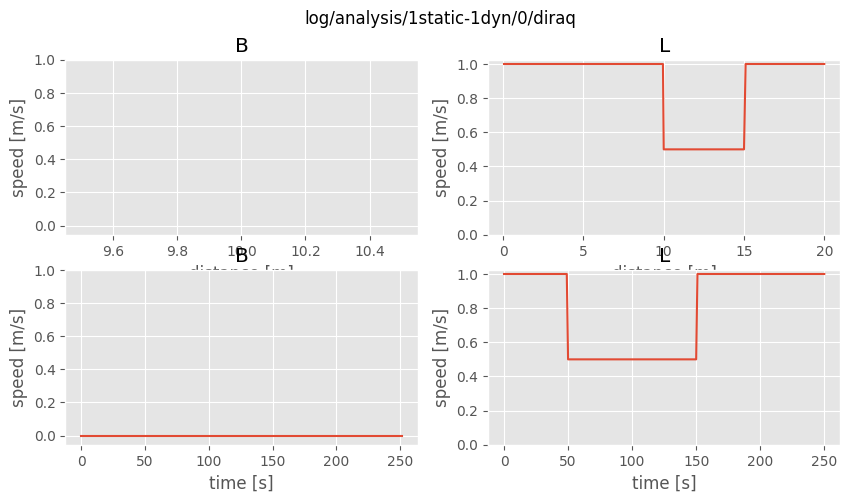

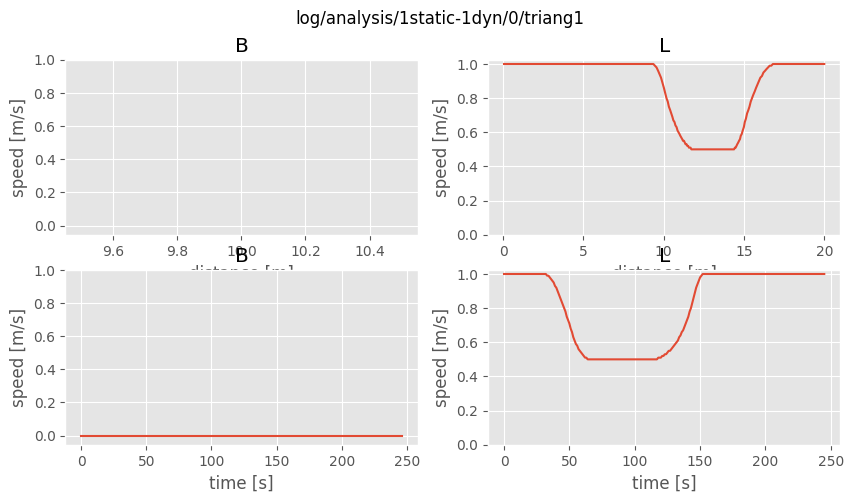

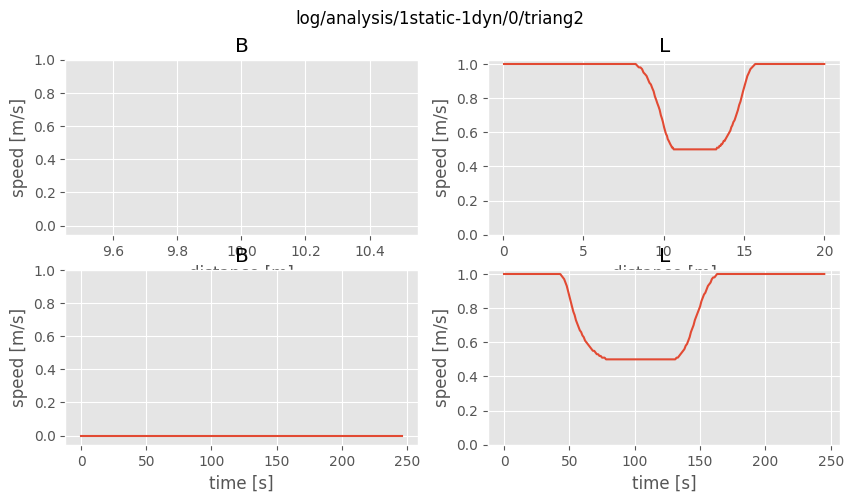

Param file [log/analysis/1dyn-1dyn/] : Starting 1 iterations ... |  ... Finished


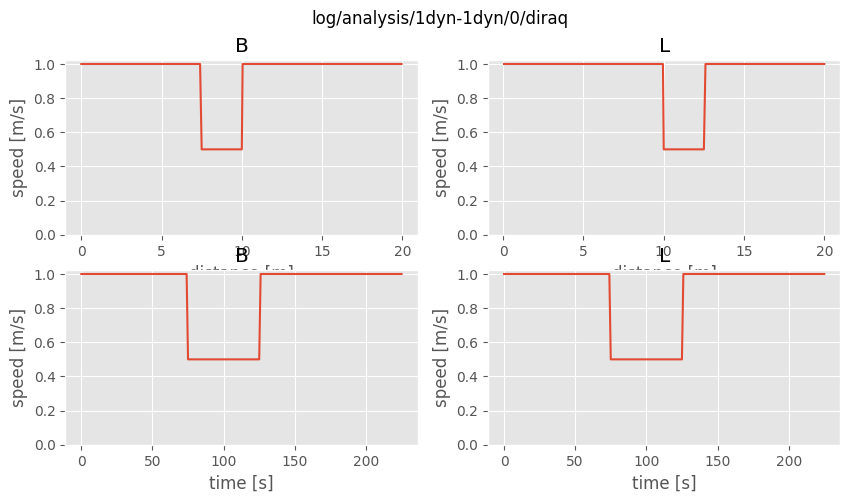

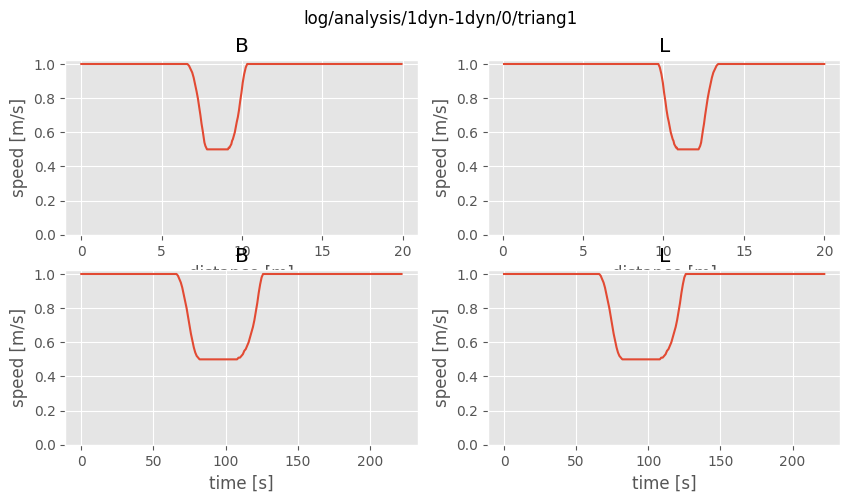

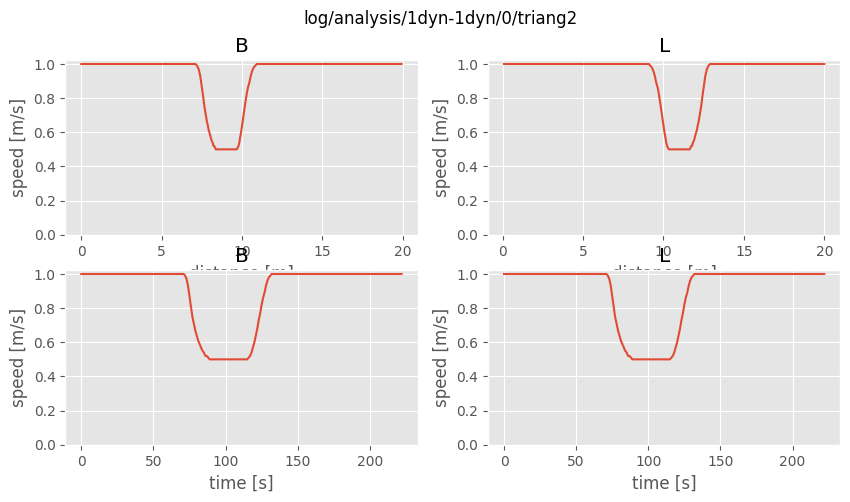

Param file [log/analysis/1dyn-1static+/] : Starting 1 iterations ... |  ... Finished


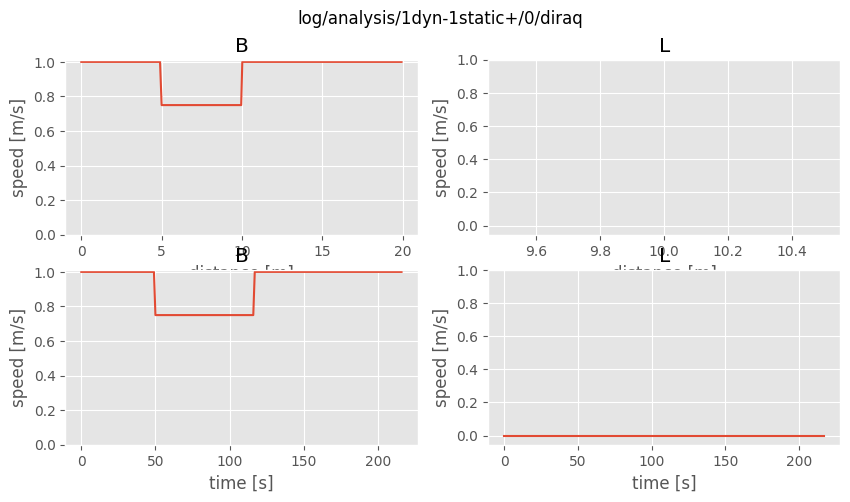

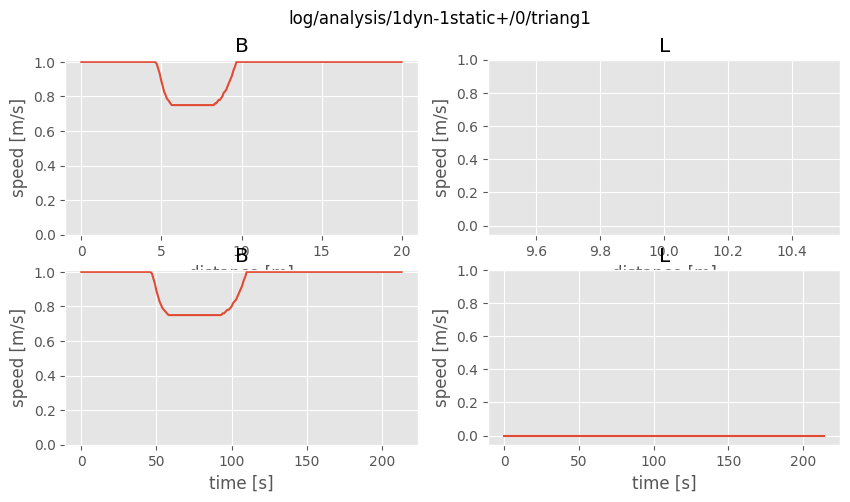

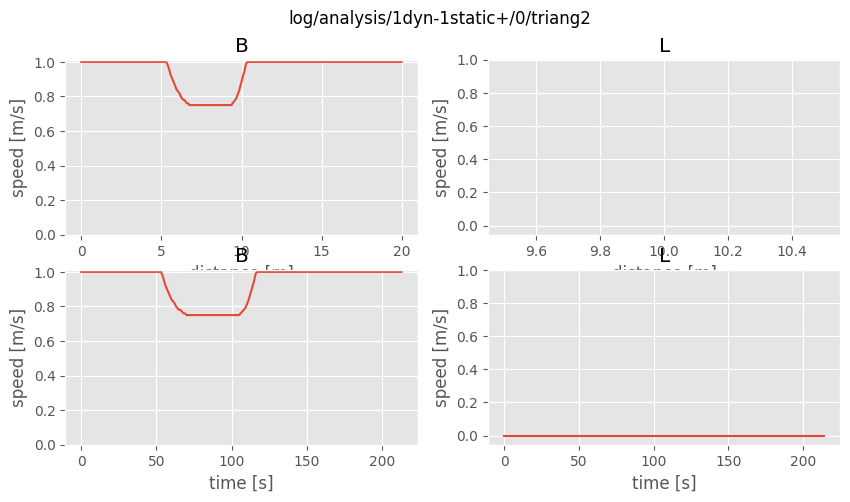

Param file [log/analysis/1static-1dyn+/] : Starting 1 iterations ... |  ... Finished


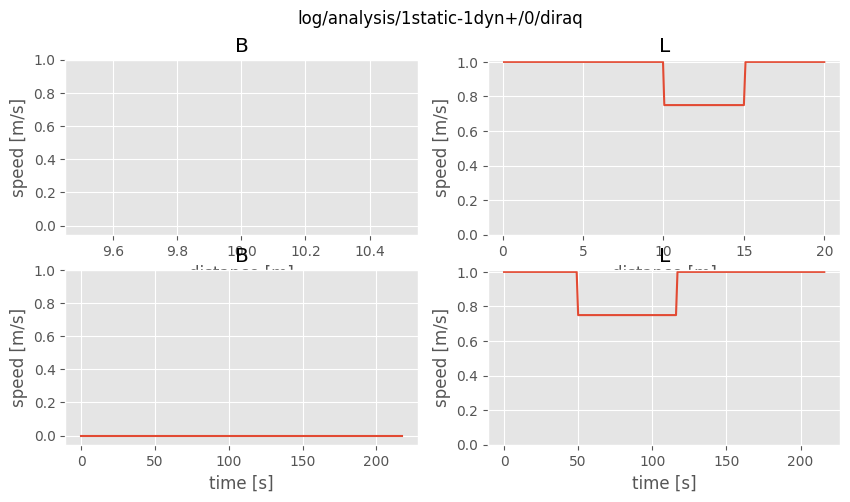

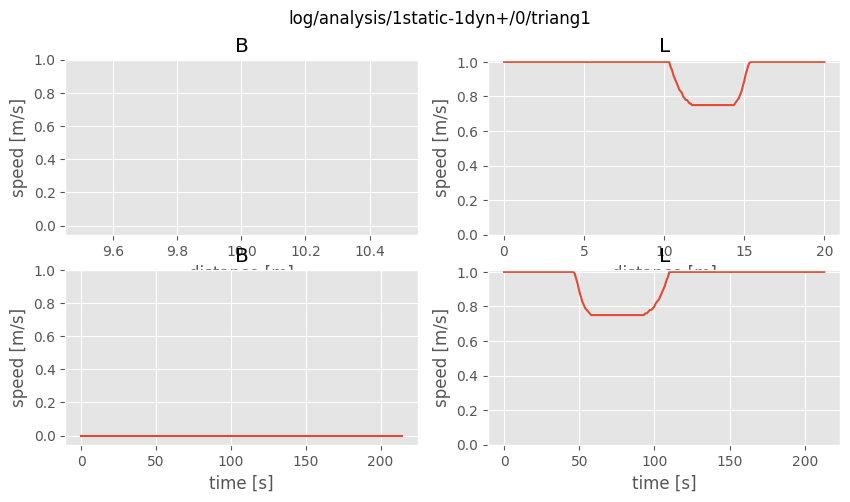

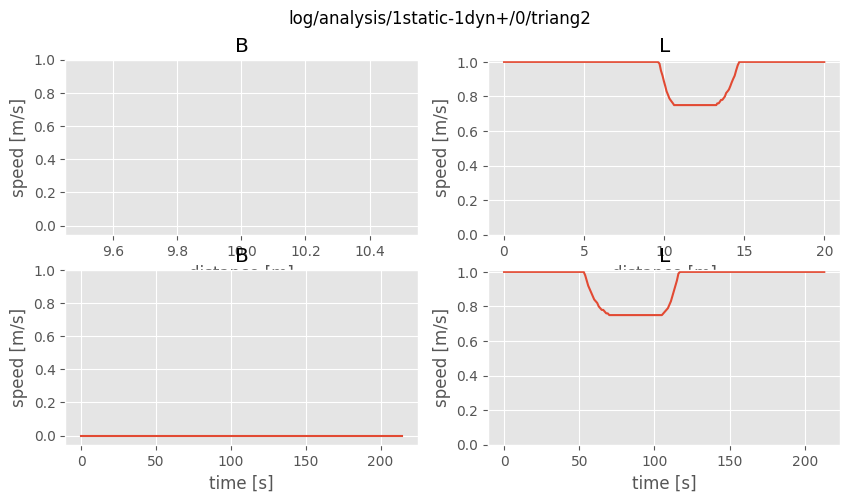

Param file [log/analysis/1dyn-1dyn+/] : Starting 1 iterations ... |  ... Finished


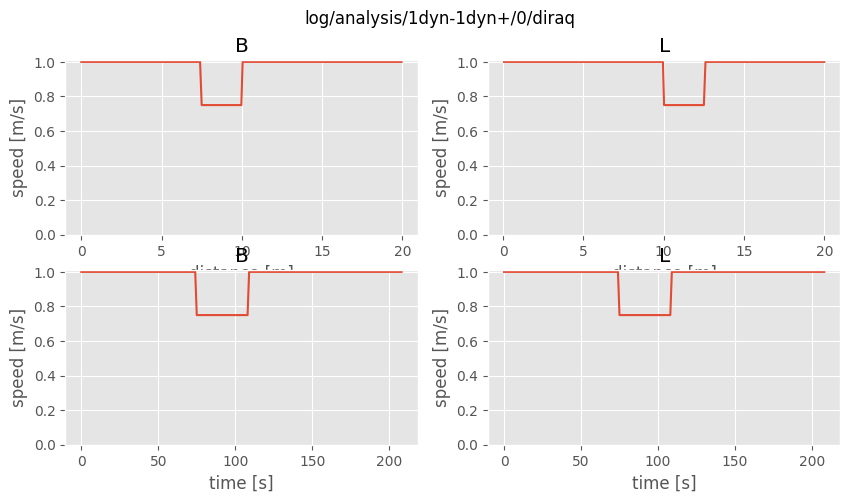

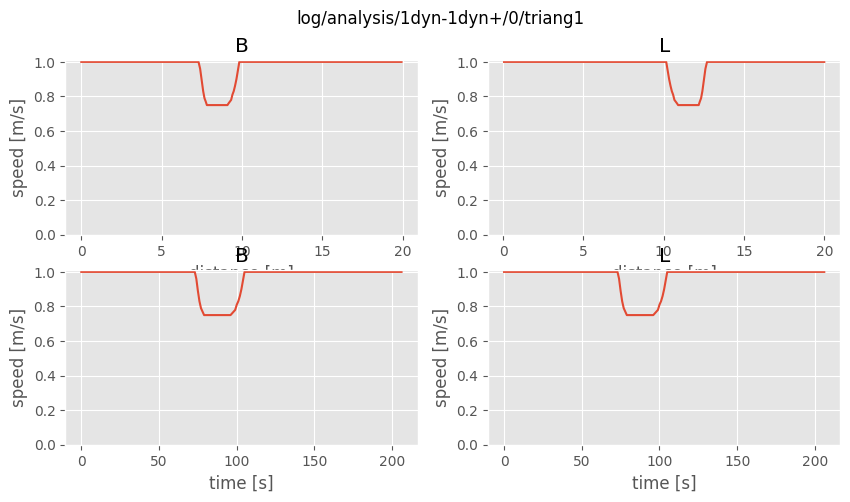

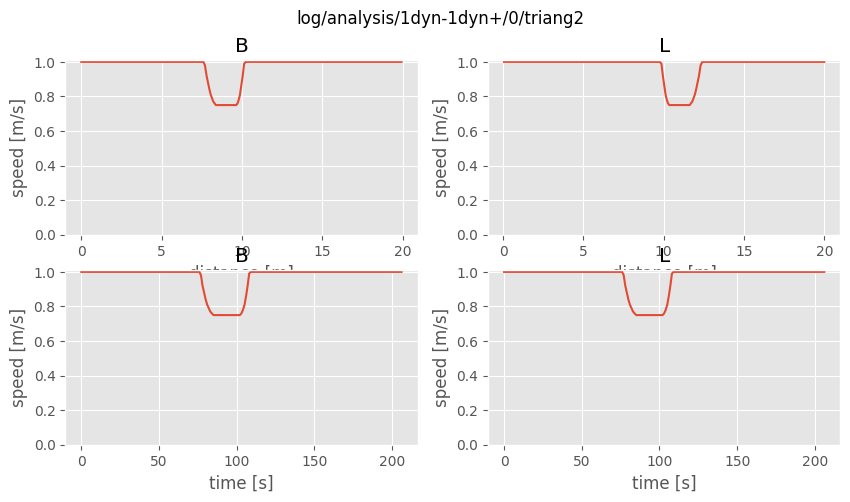

In [46]:
sim_file = '../simulation'
param_dir = '../params/'
log_dir = 'log/analysis/'
params = [
    '1dyn-1static',
    '1static-1dyn',
    '1dyn-1dyn',
    '1dyn-1static+', 
    '1static-1dyn+', 
    '1dyn-1dyn+', 
    ]
kernels = [
    "diraq",
    "triang1",
    "triang2",
    # "free"
]
for param in params:
    process = subprocess.Popen([ sim_file, '1', param_dir + param, "1" ])
    process.wait()
    for kername in kernels: 
        filename = log_dir + param + '/0'
        plot1_1(f'{filename}/{kername}', * read1_1(f'{filename}/{kername}'))

# 1 za 1

In [50]:
def read11_(filename):
    with open(f'{filename}.transportB') as file:
        vels1 = []
        pos1 = []
        vels2 = []
        pos2 = []
        line = file.readline()
        while line != '':
            line = line.strip().split()
            if len(line) > 2:
                tmp1 = line[1].strip().split(',')
                tmp2 = line[2].strip().split(',')
                if int(tmp1[0]) == 1:
                    vels1.append(float(tmp1[1]))
                    pos1.append(float(tmp1[2]))
                    vels2.append(float(tmp2[1]))
                    pos2.append(float(tmp2[2]))
                else:
                    vels2.append(float(tmp1[1]))
                    pos2.append(float(tmp1[2]))
                    vels1.append(float(tmp2[1]))
                    pos1.append(float(tmp2[2]))

            line = file.readline()
            
        return vels1, pos1, vels2, pos2

In [52]:
def plot11_(file, vels1, pos1, vels2, pos2):
    fig, ax = plt.subplots(2, 2, figsize=(10, 5))
    fig.suptitle(file)

    ax[0, 0].grid(True)
    ax[0, 0].plot(pos1, vels1)
    ax[0, 0].set_xlabel('distance [m]')
    ax[0, 0].set_ylabel('speed [m/s]')
    ax[0, 0].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[0, 0].set_title('dynamic')

    ax[0, 1].grid(True)
    ax[0, 1].plot(pos2, vels2)
    ax[0, 1].set_xlabel('distance [m]')
    ax[0, 1].set_ylabel('speed [m/s]')
    ax[0, 1].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[0, 1].set_title('dynamic')

    ax[1, 0].grid(True)
    ax[1, 0].plot(vels1)
    ax[1, 0].set_xlabel('time [s]')
    ax[1, 0].set_ylabel('speed [m/s]')
    ax[1, 0].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[1, 0].set_title('static')


    ax[1, 1].grid(True)
    ax[1, 1].plot(vels2)
    ax[1, 1].set_xlabel('time [s]')
    ax[1, 1].set_ylabel('speed [m/s]')
    ax[1, 1].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[1, 1].set_title('static')

    plt.show()

Param file [log/analysis/-1dyn1stat/] : Starting 1 iterations ... |  ... Finished


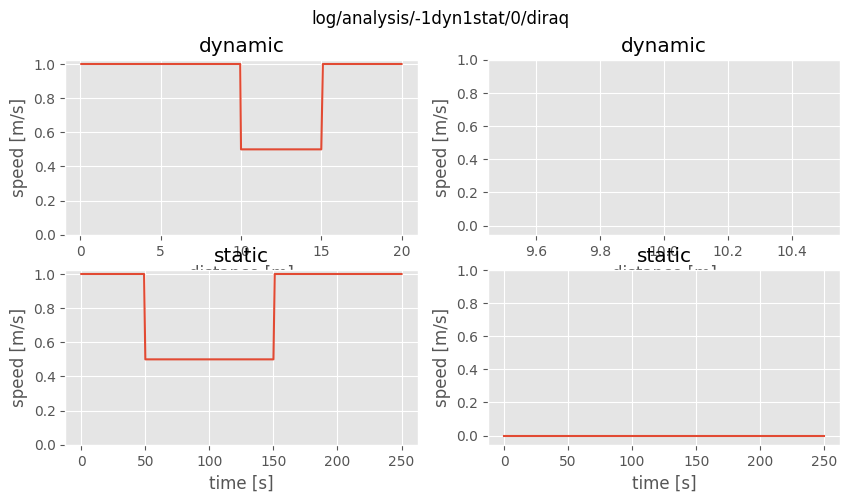

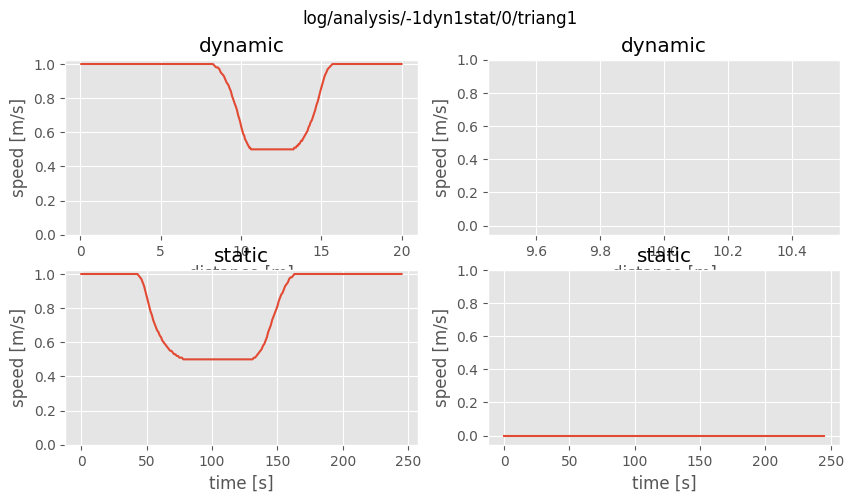

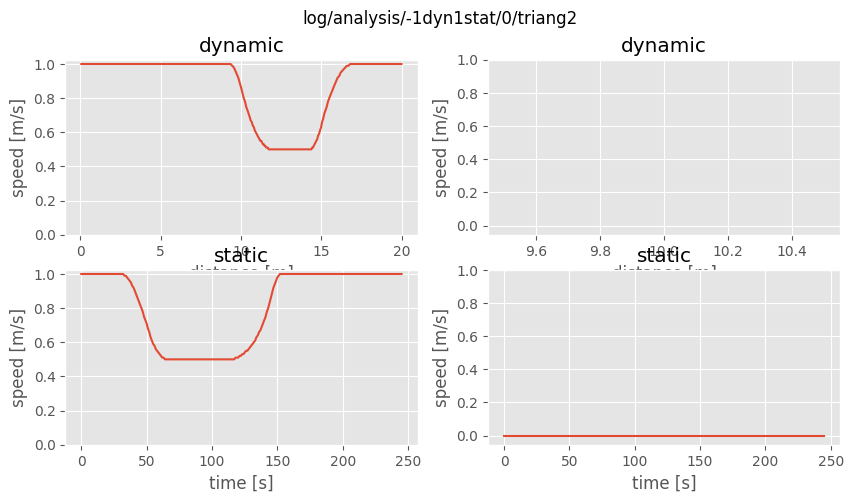

Param file [log/analysis/1dyn1stat-/] : Starting 1 iterations ... |  ... Finished


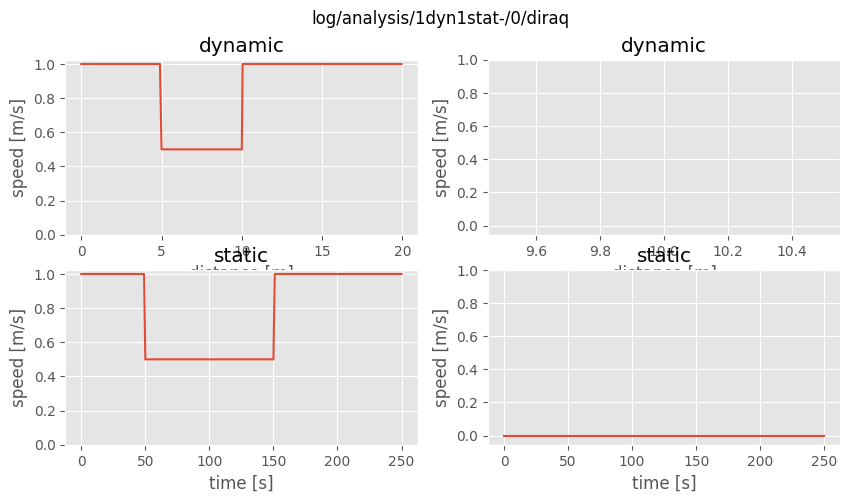

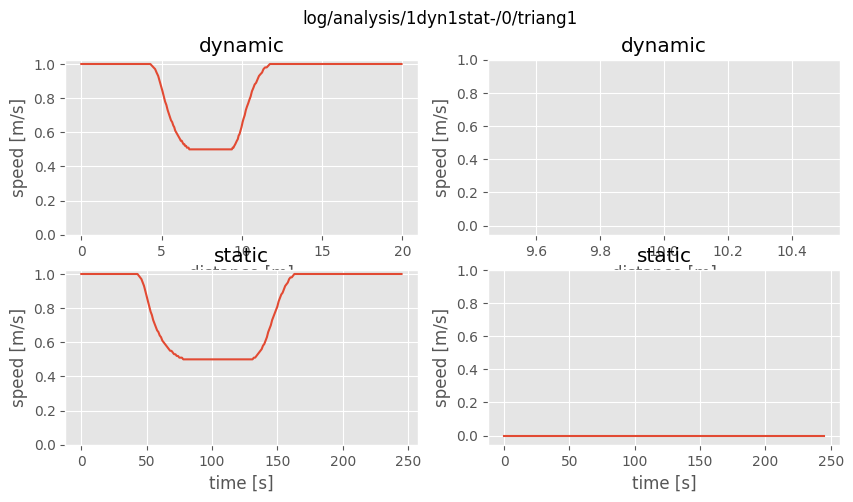

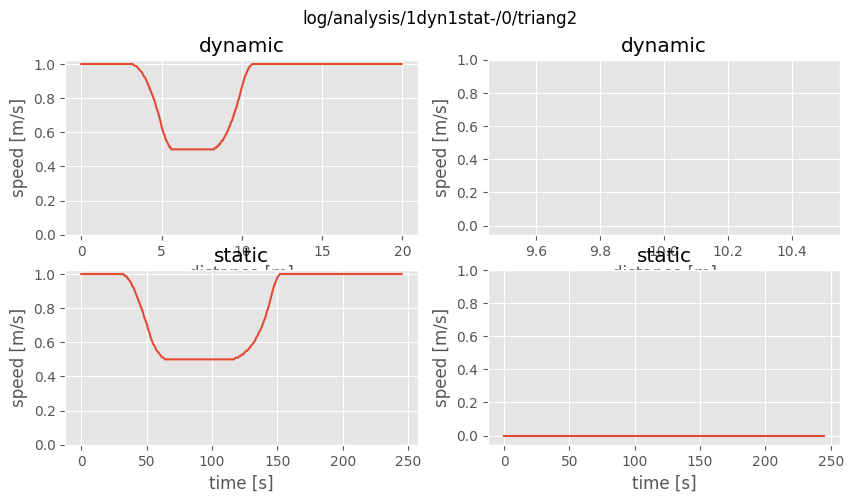

In [53]:
sim_file = '../simulation'
param_dir = '../params/'
log_dir = 'log/analysis/'
params = [
    '-1dyn1stat',
    '1dyn1stat-',
    ]
kernels = [
    "diraq",
    "triang1",
    "triang2",
    # "free"
]
for param in params:
    process = subprocess.Popen([ sim_file, '1', param_dir + param, "1" ])
    process.wait()
    for kername in kernels: 
        filename = log_dir + param + '/0'
        plot11_(f'{filename}/{kername}', * read11_(f'{filename}/{kername}'))

# Vývoj počtu aktivních chodců v čase

In [23]:
def plot_transport(data_cnt: dict, data_velo: dict, ker: str, dist: float = 300, velo: float = 1.2, log: bool = False, name = "plot", save = False):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Development of macroscopic properties: {ker}")

    lams = list(float(x) for x in data_cnt.keys())

    ax[0].grid(True)
    ax[0].boxplot(list(data_cnt.values()), positions=lams)
    ax[0].set_xlabel('lambda')
    ax[0].set_ylabel('ped count')
    ax[0].set_title('Average pedestrian count')

    ax[0].set_xlim(min(lams) - min(lams), max(lams) + min(lams))
    ax[0].set_xticklabels(list(str(x) for x in data_cnt.keys()))
    ax[0].set_xticks(lams)

    if log:
        ax[0].set_yscale('log')
    else:
        ax[0].set_ylim(0, 2000)
        # ax[0].set_ylim(0, max(max(x) for x in data_cnt.values()) + min(min(x) for x in data_cnt.values()))
    
    ax[0].plot(lams, [4 * l * dist / velo for l in lams], marker='', linestyle='--', color='g', label='without interaction')
    ax[0].plot(lams, [np.median(x) for x in data_cnt.values()], marker='', linestyle='--', color='r', label='without interaction')
    

    ax[1].grid(True)
    ax[1].boxplot(list(data_velo.values()), positions=lams)
    ax[1].set_xlabel('lambda')
    ax[1].set_ylabel('speed [m/s]')
    ax[1].set_title('Average speed')
    ax[1].set_xticklabels(list(str(x) for x in data_velo.keys()))

    ax[1].set_xlim(min(lams) - min(lams), max(lams) + min(lams))
    ax[1].set_xticklabels(list(data_velo.keys()))
    ax[1].set_xticks(lams)

    ax[1].set_ylim(0, max(max(x) for x in data_velo.values()) + 0.3)
    ax[1].axhline(velo, color='g', linestyle='--', label='without interaction')
    ax[1].plot(lams, [np.median(x) for x in data_velo.values()], marker='', linestyle='--', color='r', label='without interaction')

    if save:
        plt.savefig(f'{name}.pdf', dpi=300, bbox_inches='tight')
    plt.show

In [1]:
def read_cnt(filename, static_start, static_end, timestep):
    cnt = 0
    size = 0
    with open(filename) as f:
        for _ in range(int(static_start / timestep)): # skip non-static
            line = f.readline()
            line = f.readline()
                
        line = f.readline()
        while(line != ""): # skip non-static
            cnt += int(line.strip().split()[0]) + int(f.readline().strip().split()[0])
            size += 1
            line = f.readline()

    return cnt / (size / 2)            


In [2]:
def read_velo(filename, dist, static_start, static_end, timestep):
    velo = 0
    with open(filename) as f:
        line = f.readline()
        peds = line.strip().split()

        # peds.sort(key=lambda ped: float(ped.split(',')[1]))
        # for i in range(len(peds)):
        #     if float(peds[i].split(',')[1]) > static_end: # chodci kteří nedošli (protože se zasekli) tam ale nebudou!
        #         peds = peds[:i]
        #         break

        peds.sort(key=lambda ped: float(ped.split(',')[2]))
        for i in range(len(peds)):
            if float(peds[i].split(',')[2]) >= static_start:
                peds = peds[i:]
                break

        size = len(peds)
        for ped in peds:
            times = ped.split(',')
            velo += dist / (float(times[1]) - float(times[2]))
            
        return velo / size


In [3]:
def extract_params(file):
    with open(file) as f:
        for _ in range(4):
            line = f.readline()
        velo = float(line.split()[0].strip())
        for _ in range(11):
            line = f.readline()
        dist = float(line.split()[0].strip())
        for _ in range(5):
            line = f.readline()
        lam = float(line.split()[0].strip())
        return dist, lam, velo


In [4]:
def read_static(file, nonhomo=False):
    if nonhomo:
        return 0, 0
    
    with open(file) as f:
        peds = f.readline().strip().split()
        B_start = min(float(ped.split(',')[1]) for ped in peds if float(ped.split(',')[0]) > 0)
        L_start = min(float(ped.split(',')[1]) for ped in peds if float(ped.split(',')[0]) < 0)
        start = max(B_start, L_start)

        B_end = max(float(ped.split(',')[2]) for ped in peds if float(ped.split(',')[0]) > 0)
        L_end = max(float(ped.split(',')[2]) for ped in peds if float(ped.split(',')[0]) < 0)
        end = min(B_end, L_end)
        return start, end   


In [19]:
sim_file = '../simulation'
param_dir = '../params/'
file_type_cnt = '.transportB'
file_type_velo = '.transportB_end'
param_type = "hetero-hetero"
log_dir = f'../log/{param_type}/'
iter_cnt = 10
timestep = 0.1
run = False
params = [
    f'{param_type}1'
    ,f'{param_type}2'
    ,f'{param_type}3'
    ,f'{param_type}4'
    ,f'{param_type}5'
    ,f'{param_type}6'
    ,f'{param_type}7'
    ,f'{param_type}8'
    ]
kernels = [
    "diraq"
    ,"triang1"
    ,"triang2"
    ,"free"
]
# keys are kernels
data_cnt = dict()
data_velo = dict()

# keys are lambdas
for ker in kernels:
    data_cnt[ker] = dict()
    data_velo[ker] = dict()

for param in params[:]:
    if run == True:
        process = subprocess.Popen([ sim_file, str(iter_cnt), param_dir + param ])
        process.wait()
    dist, lam, velo = extract_params(param_dir + param)
    for kername in kernels[:]:
        data_cnt[kername][lam] = list()
        data_velo[kername][lam] = list()
        for it in range(iter_cnt):
            dir = log_dir + param + f'/{str(it)}/'
            file_cnt = f'{dir}{kername}{file_type_cnt}'
            file_velo = f'{dir}{kername}{file_type_velo}'

            static_start, static_end = read_static(file_velo)

            data_cnt[kername][lam].append(read_cnt(file_cnt, static_start, static_end, timestep))
            data_velo[kername][lam].append(read_velo(file_velo, dist, static_start, static_end, timestep))
            

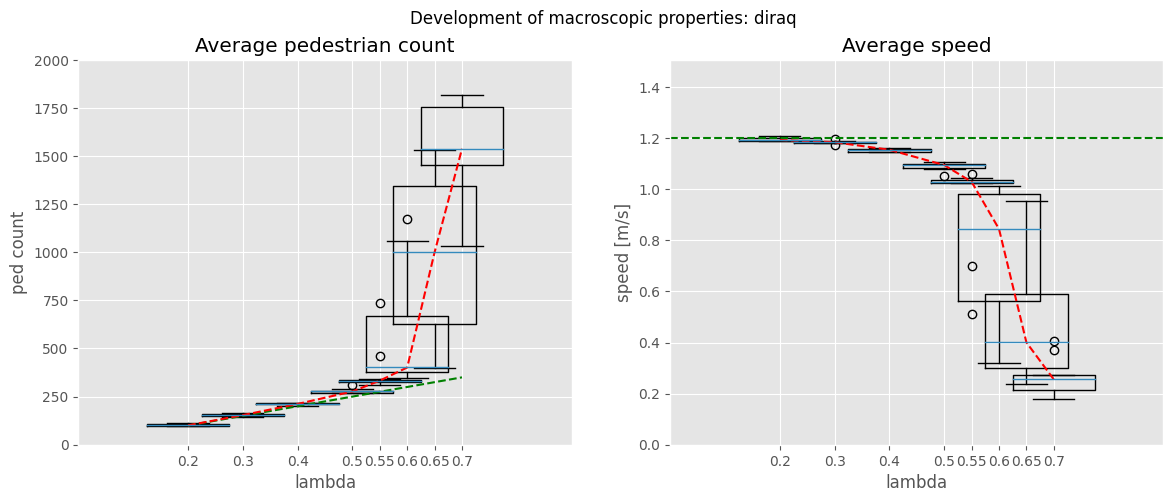

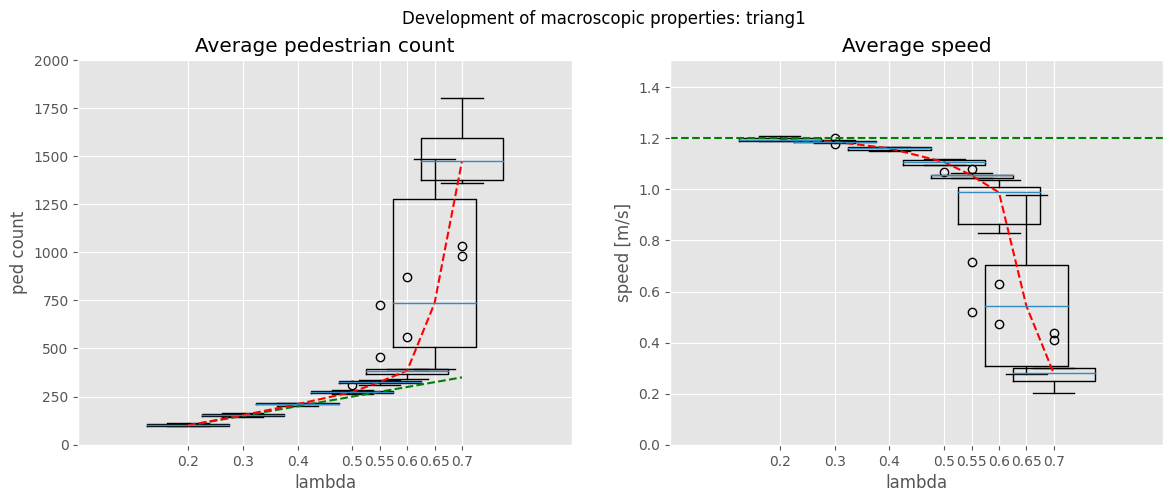

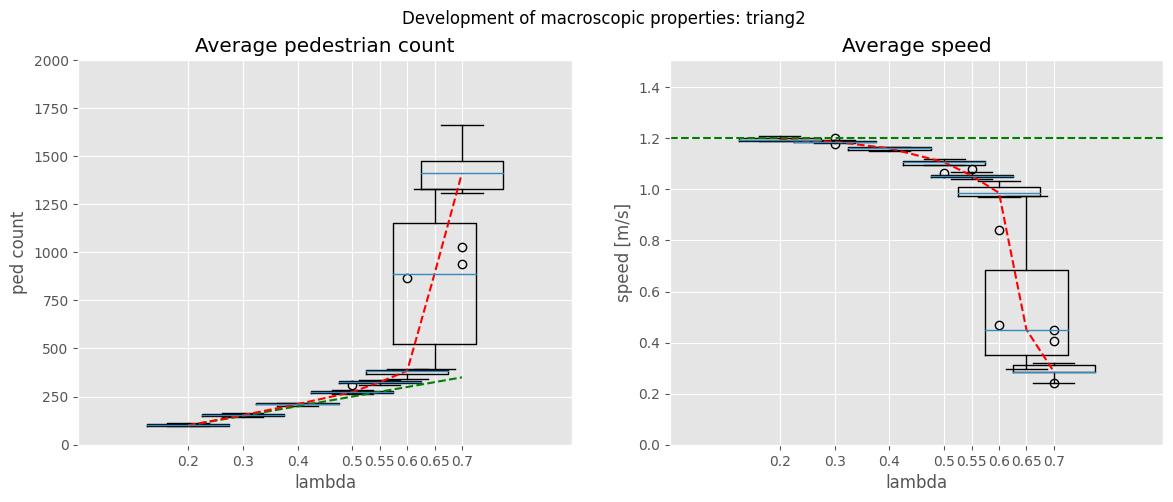

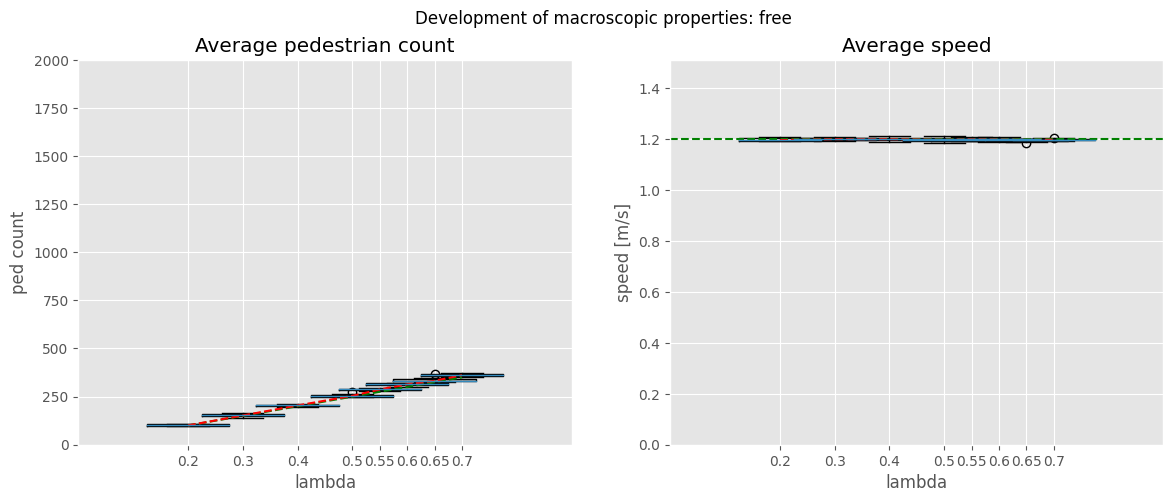

In [20]:
for ker in kernels:
    plot_transport(data_cnt[ker], data_velo[ker], ker, dist, velo, False, f'../results/{param_type}_{ker}', False)

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess

plt.style.use('ggplot')

In [55]:
def read1_1(filename):
    with open(f'{filename}.transportB') as file:
        vels1 = []
        pos1 = []
        vels2 = []
        pos2 = []
        line = file.readline()
        while line != '':
            line = line.strip().split()
            if len(line) > 1:
                tmp = line[1].strip().split(',')
                if len(tmp) > 1:
                    vels1.append(float(tmp[1]))
                    pos1.append(float(tmp[2]))

            line = file.readline().strip().split()
            if len(line) > 1:
                tmp = line[1].strip().split(',')
                if len(tmp) > 1:
                    vels2.append(float(tmp[1]))
                    pos2.append(float(tmp[2]))

            line = file.readline()
            
        return vels1, pos1, vels2, pos2

In [56]:
def read11_(filename):
    with open(f'{filename}.transportB') as file:
        vels1 = []
        pos1 = []
        vels2 = []
        pos2 = []
        line = file.readline()
        while line != '':
            line = line.strip().split()
            if len(line) > 2:
                tmp1 = line[1].strip().split(',')
                tmp2 = line[2].strip().split(',')
                if int(tmp1[0]) == 1:
                    vels1.append(float(tmp1[1]))
                    pos1.append(float(tmp1[2]))
                    vels2.append(float(tmp2[1]))
                    pos2.append(float(tmp2[2]))
                else:
                    vels2.append(float(tmp1[1]))
                    pos2.append(float(tmp1[2]))
                    vels1.append(float(tmp2[1]))
                    pos1.append(float(tmp2[2]))

            line = file.readline()
            
        return vels1, pos1, vels2, pos2

In [57]:
def plot1_1(file, vels1, pos1, vels2, pos2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    fig.suptitle(file)

    ax[0].grid(True)
    ax[0].plot(pos1, vels1)
    ax[0].set_xlabel('distance [m]')
    ax[0].set_ylabel('speed [m/s]')
    ax[0].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[0].set_title('B')

    ax[1].grid(True)
    ax[1].plot(pos2, vels2)
    ax[1].set_xlabel('distance [m]')
    ax[1].set_ylabel('speed [m/s]')
    ax[1].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[1].set_title('L')

    plt.show()

In [73]:
def plot_all(data, kernel):
    fig, ax = plt.subplots(3, 2, figsize=(20, 16))
    # fig.suptitle(f'Experiments With {kernel.capitalize()} Kernel, R_crit = 0', size=20)
    
    for i, traj in enumerate(data[kernel]):
        if i == 0:
            ax[0, 0].grid(True)
            ax[0, 0].plot(traj[1], traj[0])
            ax[0, 0].set_xlabel('distance [m]')
            ax[0, 0].set_ylabel('speed [m/s]')
            ax[0, 0].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[0, 0].set_title('B-type moving, L-type static')
            
        if i == 1:
            ax[0, 1].grid(True)
            ax[0, 1].plot(traj[3], traj[2])
            ax[0, 1].set_xlabel('distance [m]')
            ax[0, 1].set_ylabel('speed [m/s]')
            ax[0, 1].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[0, 1].set_title('L-type moving, B-type static')

        if i == 2:
            ax[1, 0].grid(True)
            ax[1, 0].plot(traj[1], traj[0])
            ax[1, 0].set_xlabel('distance [m]')
            ax[1, 0].set_ylabel('speed [m/s]')
            ax[1, 0].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[1, 0].set_title('B-type moving, B-type static')
            
        if i == 3:
            ax[1, 1].grid(True)
            ax[1, 1].plot(traj[1], traj[0])
            ax[1, 1].set_xlabel('distance [m]')
            ax[1, 1].set_ylabel('speed [m/s]')
            ax[1, 1].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[1, 1].set_title('L-type moving, L-type static')

        if i == 4:
            ax[2, 0].grid(True)
            ax[2, 0].plot(traj[1], traj[0])
            ax[2, 0].set_xlabel('distance [m]')
            ax[2, 0].set_ylabel('speed [m/s]')
            ax[2, 0].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[2, 0].set_title('B-type moving towards moving L-type')

            ax[2, 1].grid(True)
            ax[2, 1].plot(traj[3], traj[2])
            ax[2, 1].set_xlabel('distance [m]')
            ax[2, 1].set_ylabel('speed [m/s]')
            ax[2, 1].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[2, 1].set_title('L-type moving towards moving B-type')

    plt.savefig(f"{kernel}-1-1tests.pdf")
    plt.show()

In [74]:
def plot_all_(data, kernel):
    fig, ax = plt.subplots(2, 2, figsize=(20, 11))
    # fig.suptitle(f'Experiments With {kernel.capitalize()} Kernel, R_crit = 0.5', size=20)
    
    for i, traj in enumerate(data[kernel][5:]):
        if i == 0:
            ax[0, 0].grid(True)
            ax[0, 0].plot(traj[1], traj[0])
            ax[0, 0].set_xlabel('distance [m]')
            ax[0, 0].set_ylabel('speed [m/s]')
            ax[0, 0].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[0, 0].set_title('B-type moving, L-type static')
            
        if i == 1:
            ax[0, 1].grid(True)
            ax[0, 1].plot(traj[3], traj[2])
            ax[0, 1].set_xlabel('distance [m]')
            ax[0, 1].set_ylabel('speed [m/s]')
            ax[0, 1].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[0, 1].set_title('L-type moving, B-type static')


        if i == 2:
            ax[1, 0].grid(True)
            ax[1, 0].plot(traj[1], traj[0])
            ax[1, 0].set_xlabel('distance [m]')
            ax[1, 0].set_ylabel('speed [m/s]')
            ax[1, 0].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[1, 0].set_title('B-type moving towards moving L-type')

            ax[1, 1].grid(True)
            ax[1, 1].plot(traj[3], traj[2])
            ax[1, 1].set_xlabel('distance [m]')
            ax[1, 1].set_ylabel('speed [m/s]')
            ax[1, 1].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[1, 1].set_title('L-type moving towards moving B-type')

    plt.savefig(f"{kernel}-1-1tests+.pdf")
    plt.show()

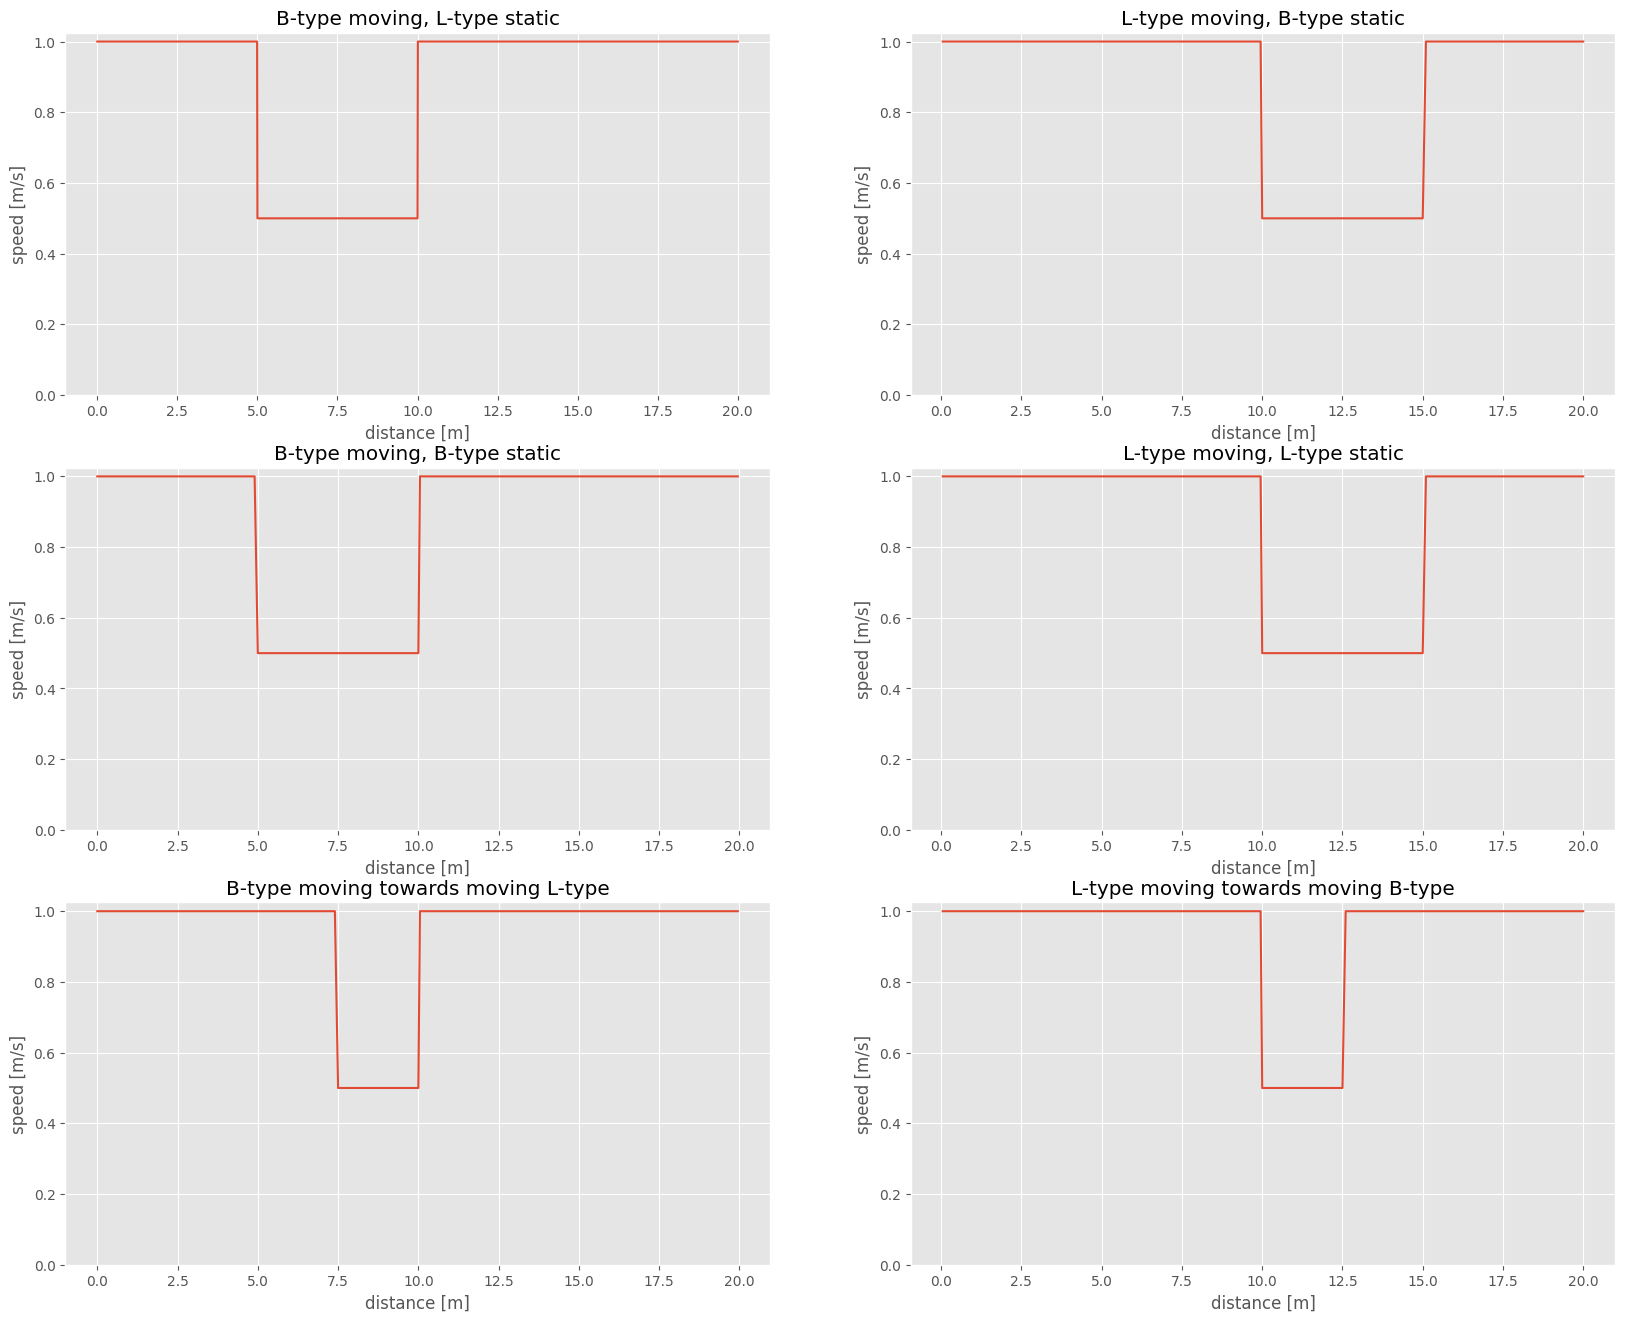

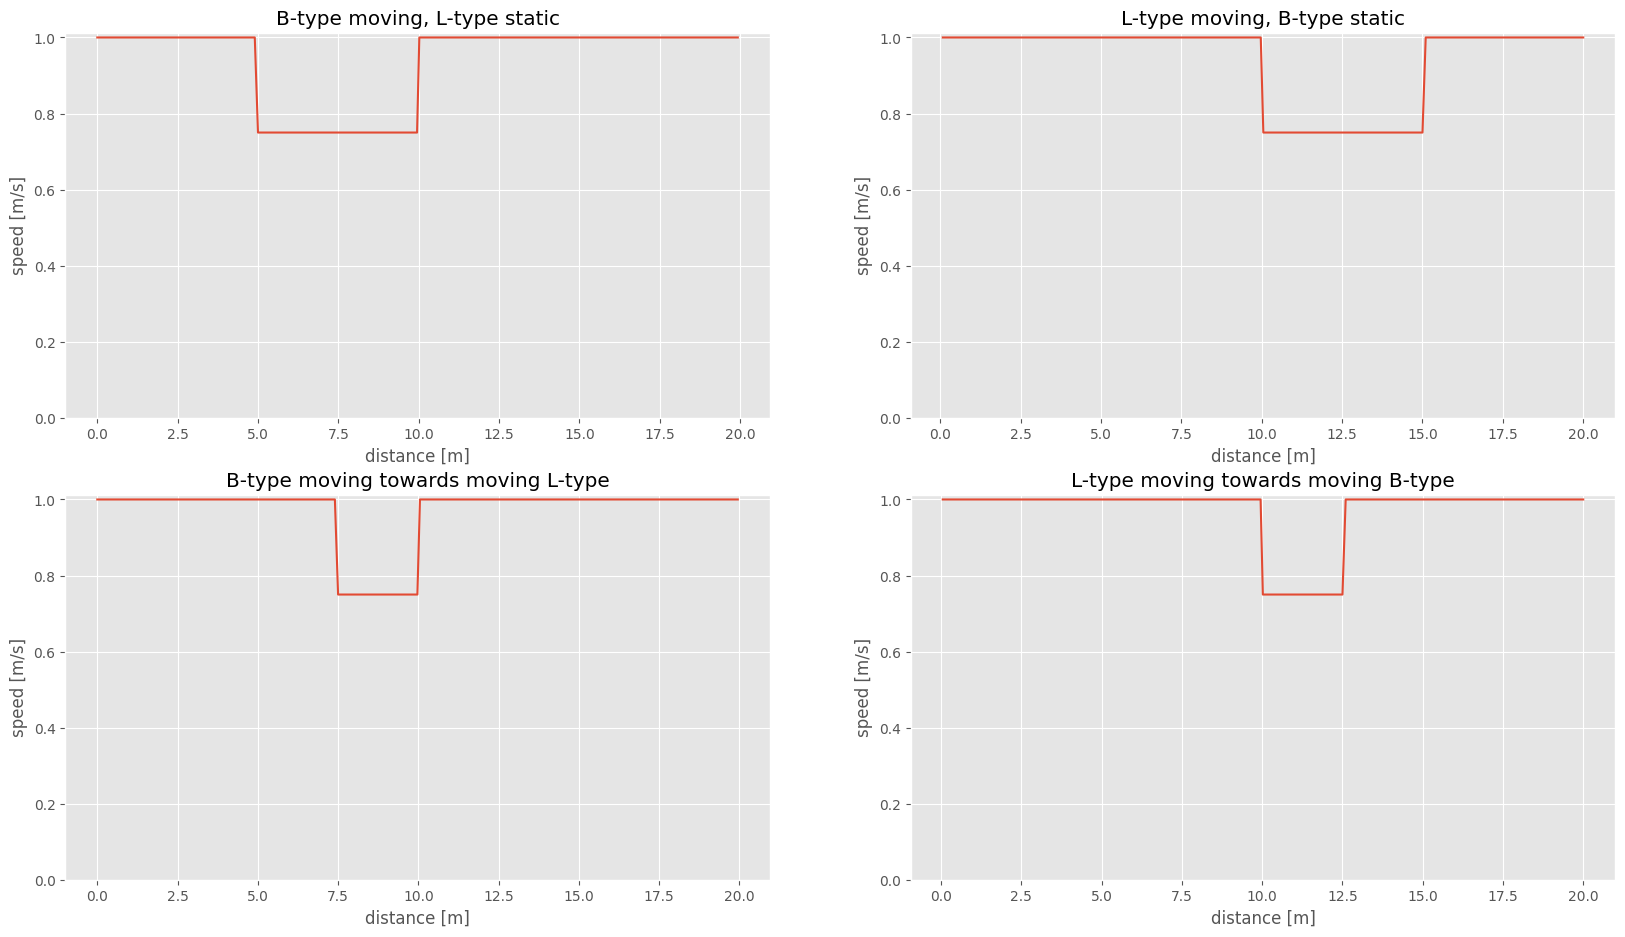

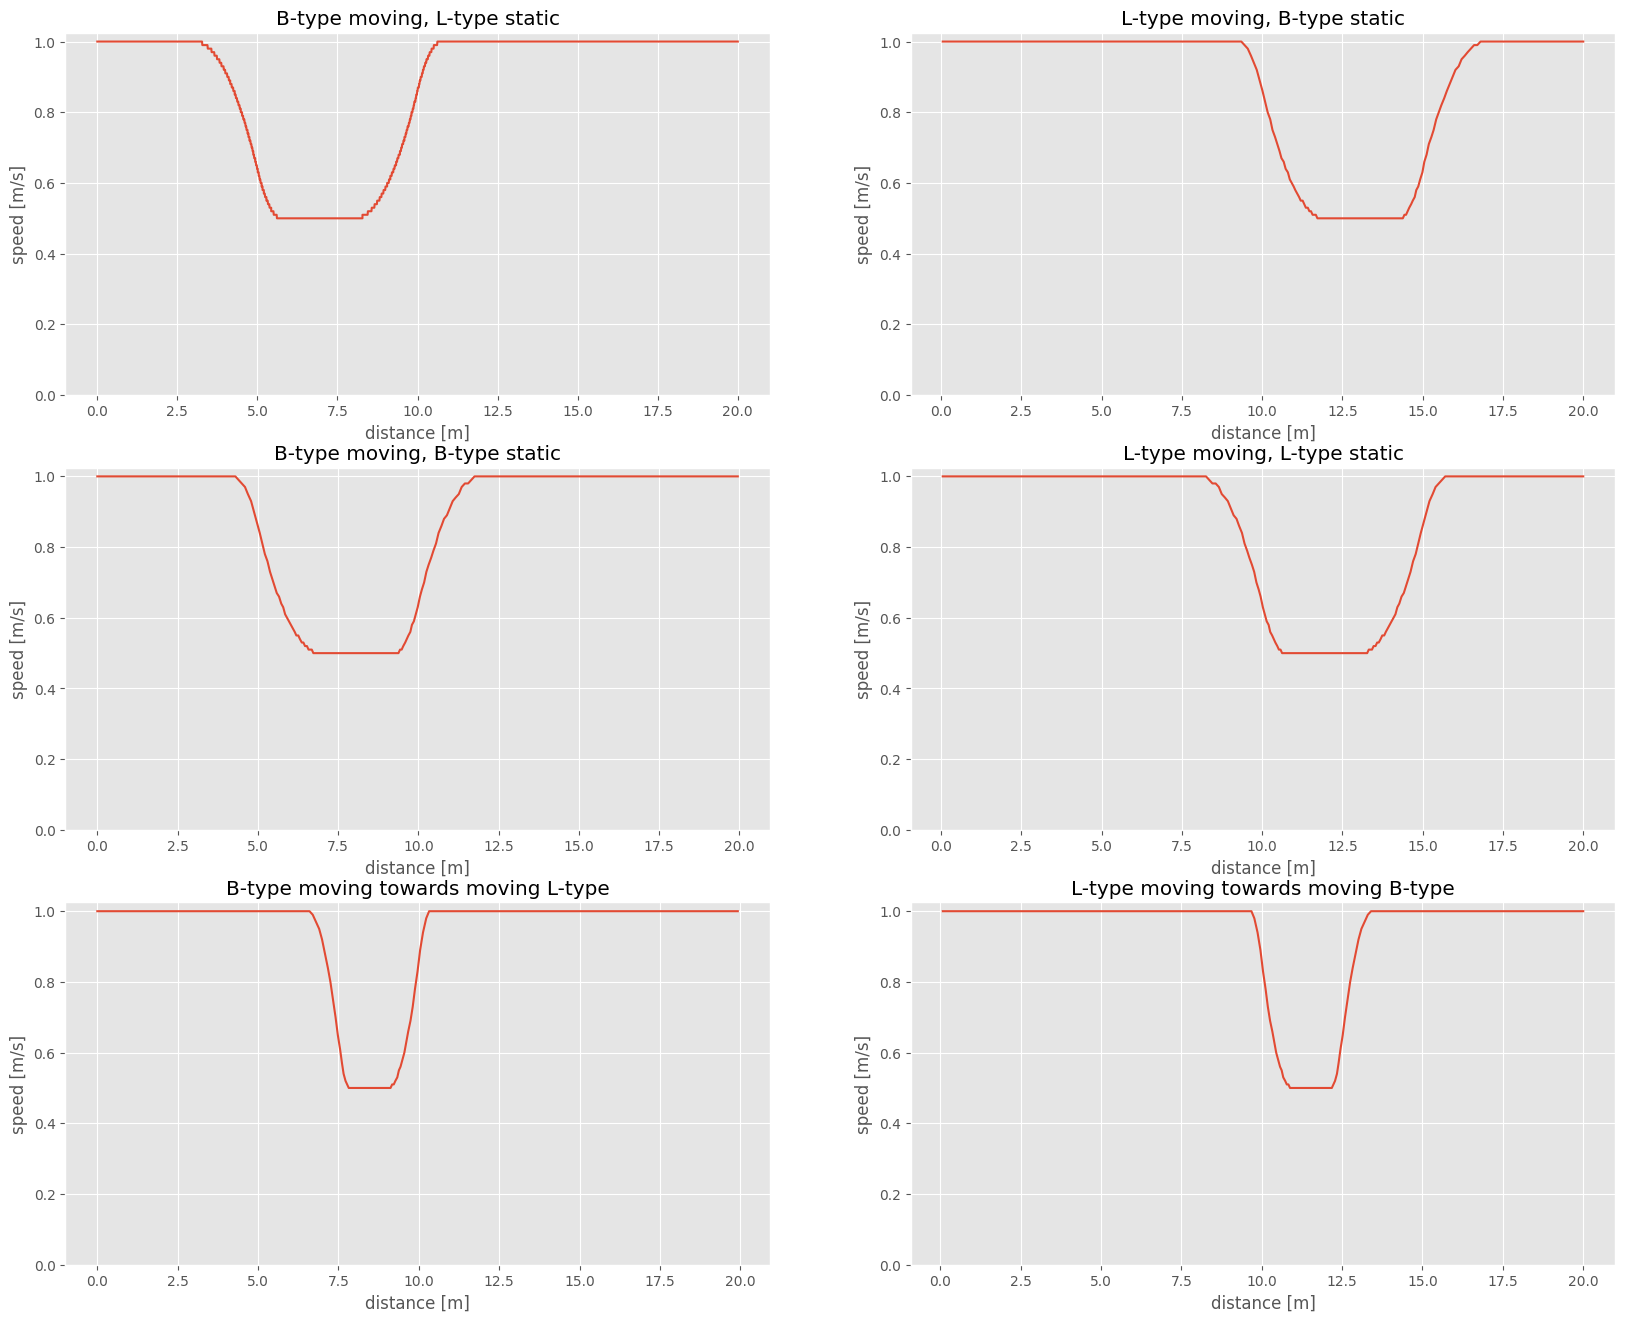

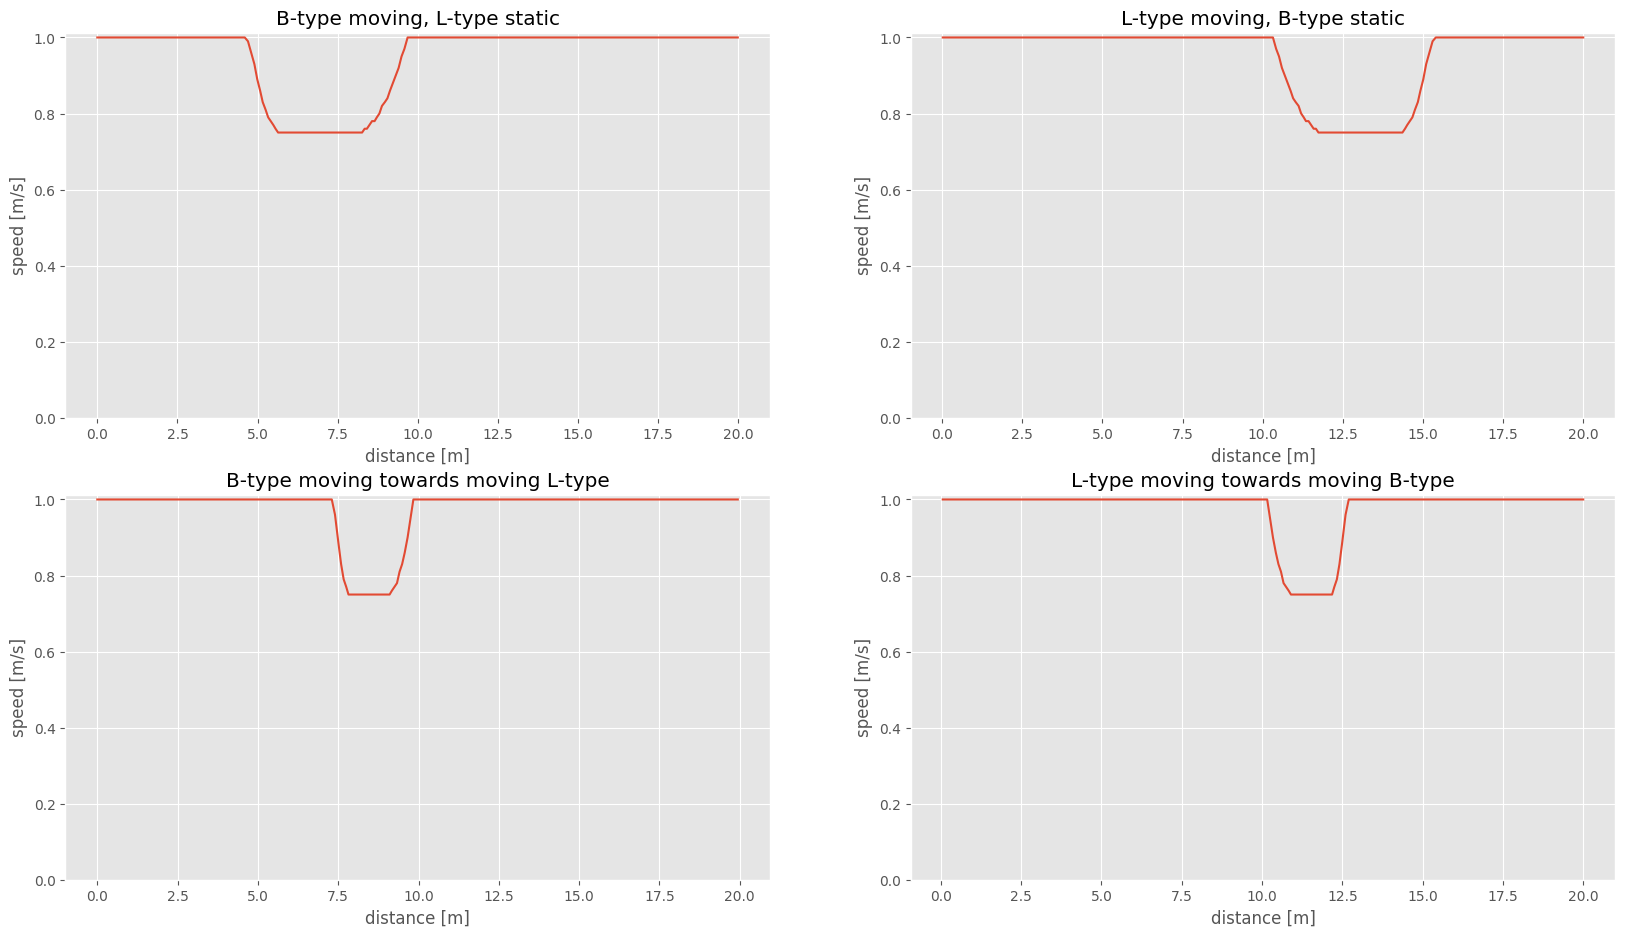

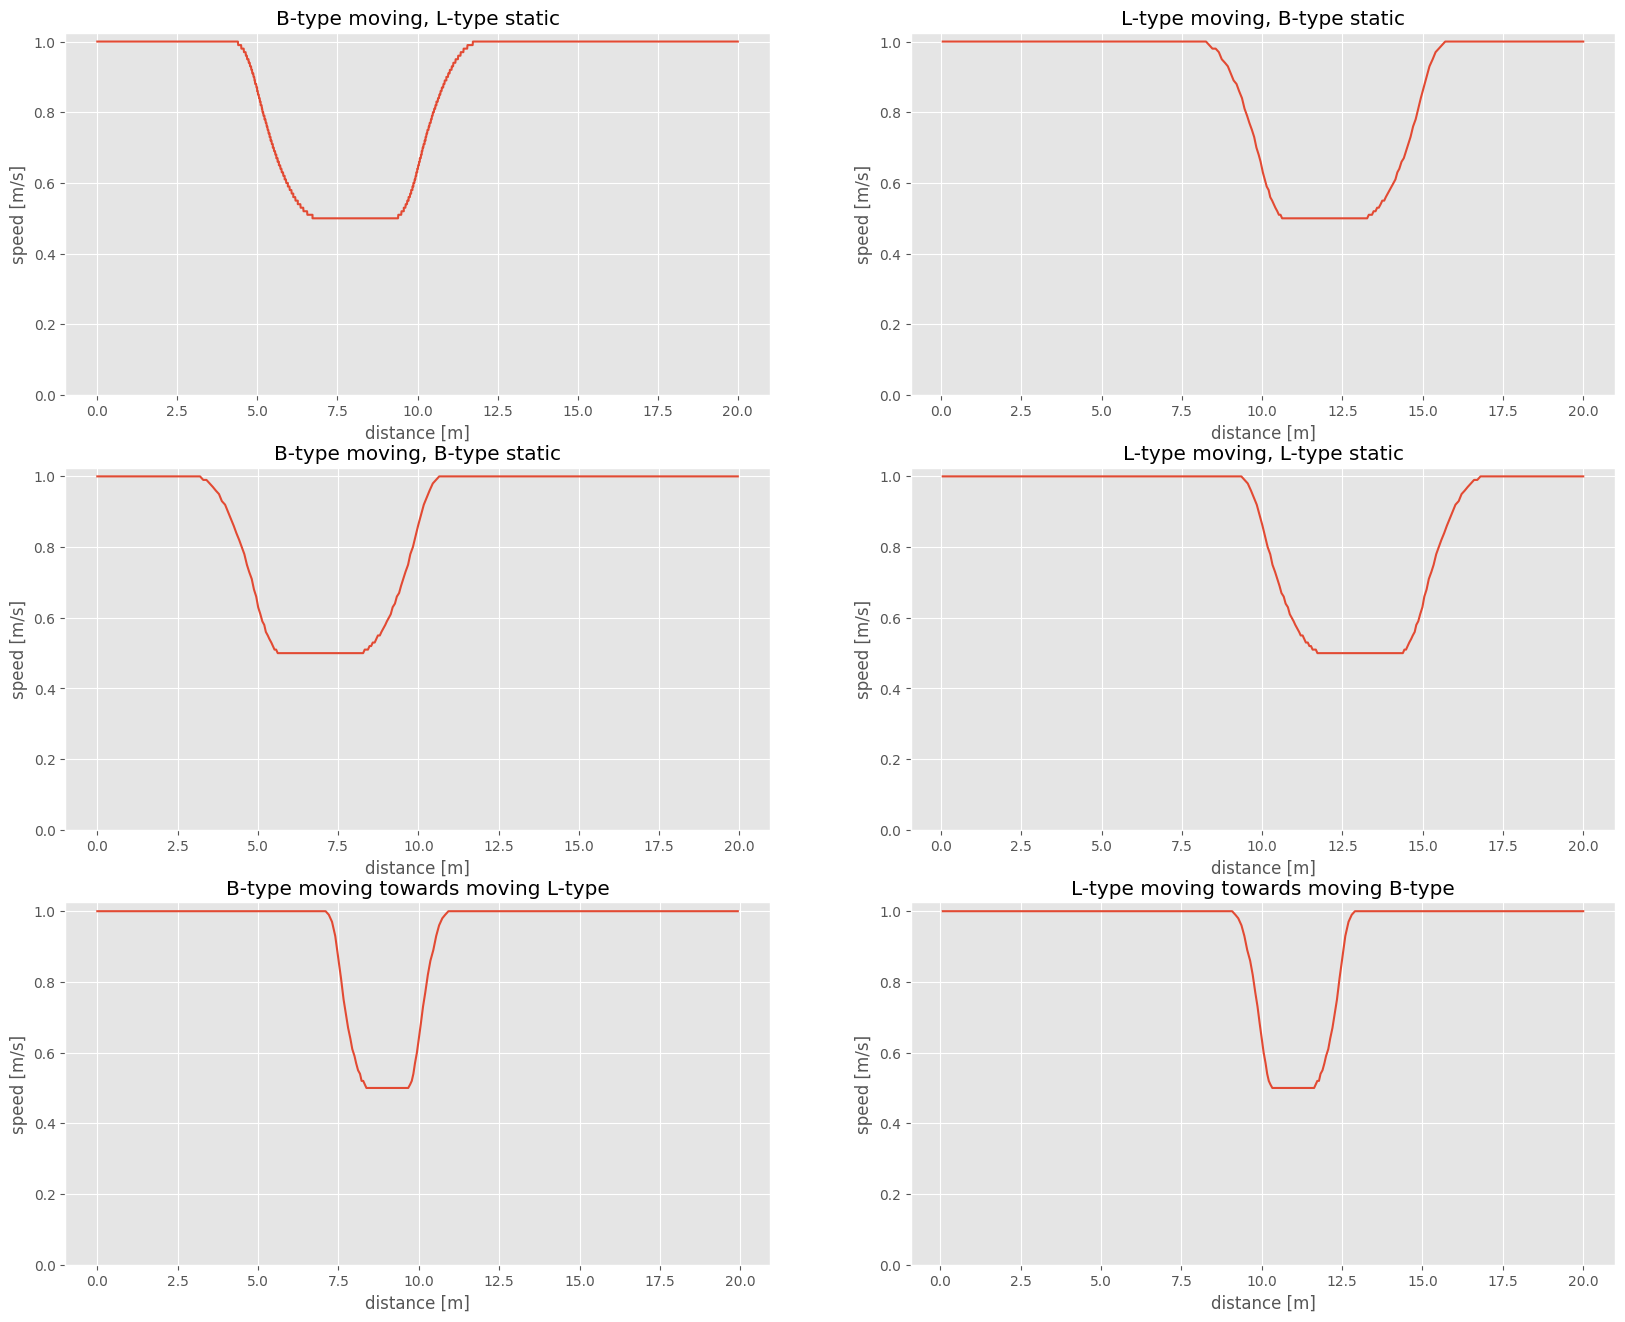

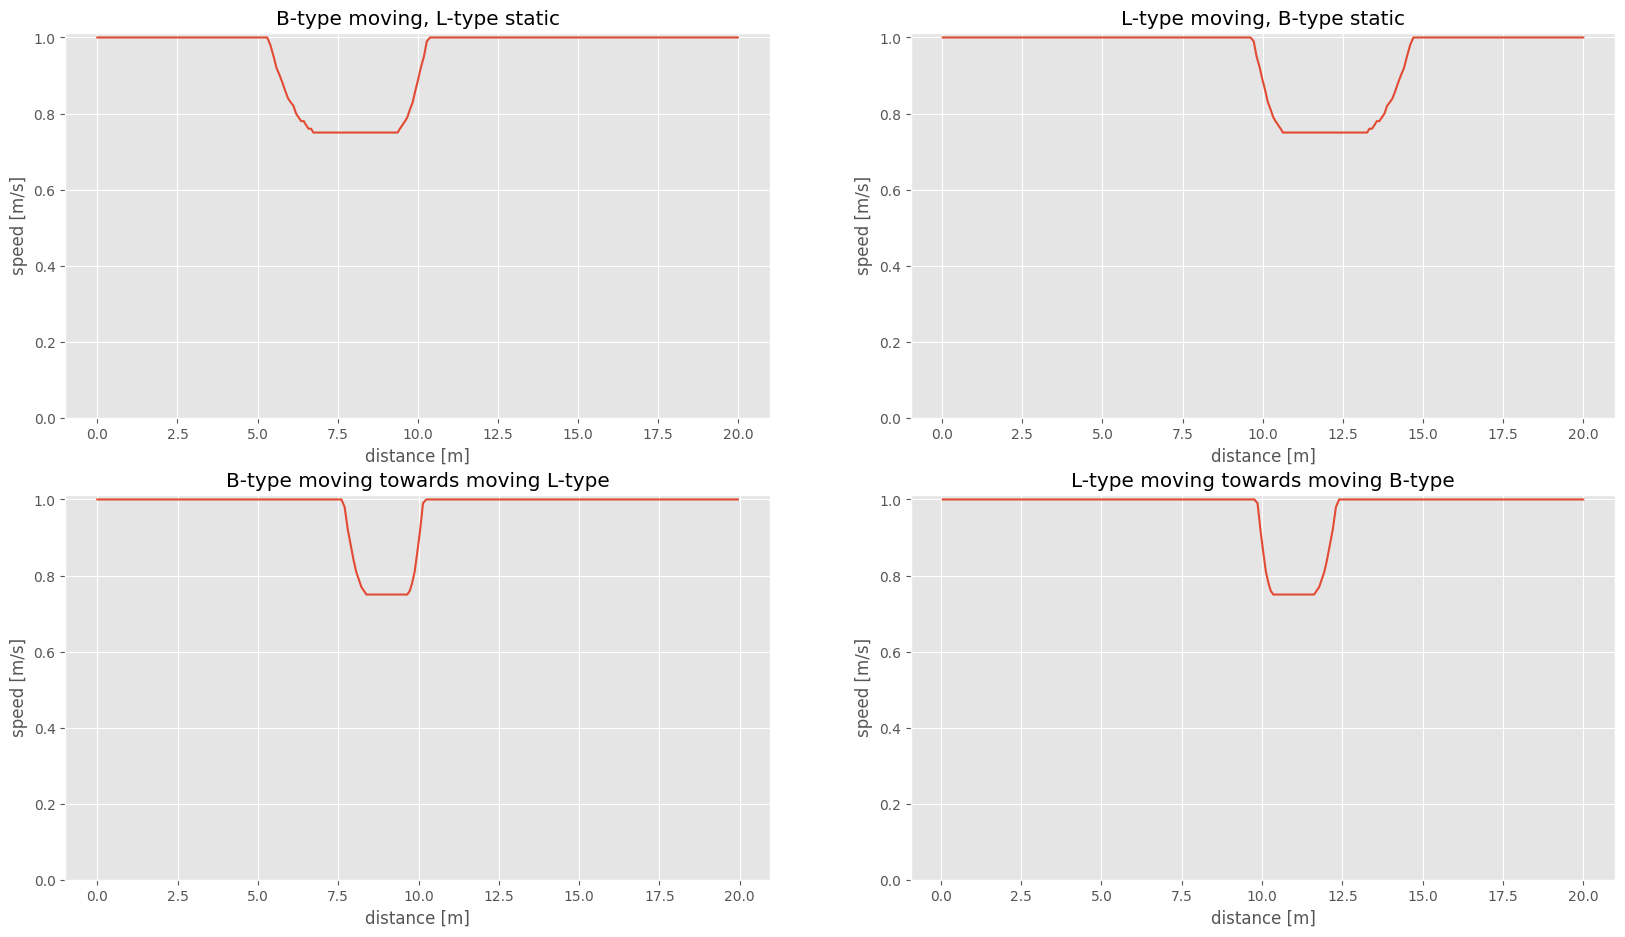

In [75]:
run = False
sim_file = '../simulation'
param_dir = '../params/'
log_dir = 'log/analysis/'
params = [
    '1dyn-1static',
    '1static-1dyn',
    '1dyn1stat-',
    '-1dyn1stat',
    '1dyn-1dyn',
    '1dyn-1static+', 
    '1static-1dyn+', 
    '1dyn-1dyn+', 
    ]
kernels = [
    "diraq",
    "triang1",
    "triang2",
    # "free"
]
data = {}
for kername in kernels:
    data[kername] = []
    if run:
        process = subprocess.Popen([ sim_file, '1', param_dir + param, "1" ])
        process.wait()
    for param in params:
        filename = log_dir + param + '/0'

        if param in ['-1dyn1stat', '1dyn1stat-']:
            data[kername].append((read11_(f'{filename}/{kername}')))
            # plot1_1(f'{filename}/{kername}', * read11_(f'{filename}/{kername}'))
        else:
            data[kername].append((read1_1(f'{filename}/{kername}')))
            # plot1_1(f'{filename}/{kername}', * read1_1(f'{filename}/{kername}'))
    
    plot_all(data, kername)        
    plot_all_(data, kername)        

In [5]:
FONTSIZE = 15
MAX_COUNT = 2600

def plot_macro_(d_cnt: dict, d_velo: dict, ker: str, dist: float = 300, velo: float = 1.2, log: bool = False, param_types: list = [""], homo="homo"):
    fig, ax = plt.subplots(1, 3, figsize=(20, 7))
    # fig.suptitle(f"Development of Average Pedestrian Count for {ker.capitalize()} Kernel", size=20)
    
    for i, par in enumerate(param_types):
        data_cnt = d_cnt[par]
        data_velo = d_velo[par]

        lams = list(float(x) for x in data_cnt.keys())

        ax[i].grid(True)
        ax[i].boxplot(list(data_cnt.values()), positions=lams)
        ax[i].set_xlabel('Average Arrival Intensity from One Direction [ped/s]')
        ax[i].set_ylabel('Average Agent Count')
        
        for nn in range(1, 4):
            if par[0] == str(nn):
                ax[i].set_title(f'Arrival Intensity Scenario {nn}', size=FONTSIZE)
                
        if par[0] == "h":
            ax[i].set_title(f'Speed Distribution Scenario {i + 1}', size=FONTSIZE)

        # ax[i].set_xlim(min(lams) - min(lams), max(lams) + min(lams))
        # ax[i].set_xticklabels(list(str(x) for x in data_cnt.keys()))
        # ax[i].set_xticks(lams)
        ax[i].set_xlim(min(lams) - 0.1, max(lams) + 0.1)
        ax[i].set_ylim(0, MAX_COUNT)
        
        ax[i].plot(lams, [4 * l * dist / velo for l in lams], marker='', linestyle='--', color='g', label='Without Interaction')
        ax[i].plot(lams, [np.median(x) for x in data_cnt.values()], marker='', linestyle='--', color='r', label='Simulation Results')
        ax[i].legend(loc="upper left", fontsize=FONTSIZE)
        
    plt.savefig(f'{homo}-macro-count-{ker}.pdf', dpi=300, bbox_inches='tight')
    plt.show()

    fig, ax = plt.subplots(1, 3, figsize=(20, 7))
    # fig.suptitle(f"Development of Average Velocity for {ker.capitalize()} Kernel", size=20)
    
    for i, par in enumerate(param_types):
        data_cnt = d_cnt[par]
        data_velo = d_velo[par]

        lams = list(float(x) for x in data_cnt.keys())

        ax[i].grid(True)
        ax[i].boxplot(list(data_velo.values()), positions=lams)
        ax[i].set_xlabel('Average Arrival Intensity from One Direction [ped/s]')
        ax[i].set_ylabel('Average Agent Speed [m/s]')

        for nn in range(1, 4):
            if par[0] == str(nn):
                ax[i].set_title(f'Arrival Intensity Scenario {nn}', size=FONTSIZE)
                
        if par[0] == "h":
            ax[i].set_title(f'Speed Distribution Scenario {i + 1}', size=FONTSIZE)

        ax[i].set_xlim(min(lams) - 0.1, max(lams) + 0.1)
        ax[i].set_ylim(0, max(max(x) for x in data_velo.values()) + 0.05)

        ax[i].axhline(velo, color='g', linestyle='--', label='Without Interaction')
        ax[i].plot(lams, [np.median(x) for x in data_velo.values()], marker='', linestyle='--', color='r', label='Simulation Results')
        ax[i].legend(loc="lower left", fontsize=FONTSIZE)

    plt.savefig(f'{homo}-macro-speed-{ker}.pdf', dpi=300, bbox_inches='tight')
    plt.show

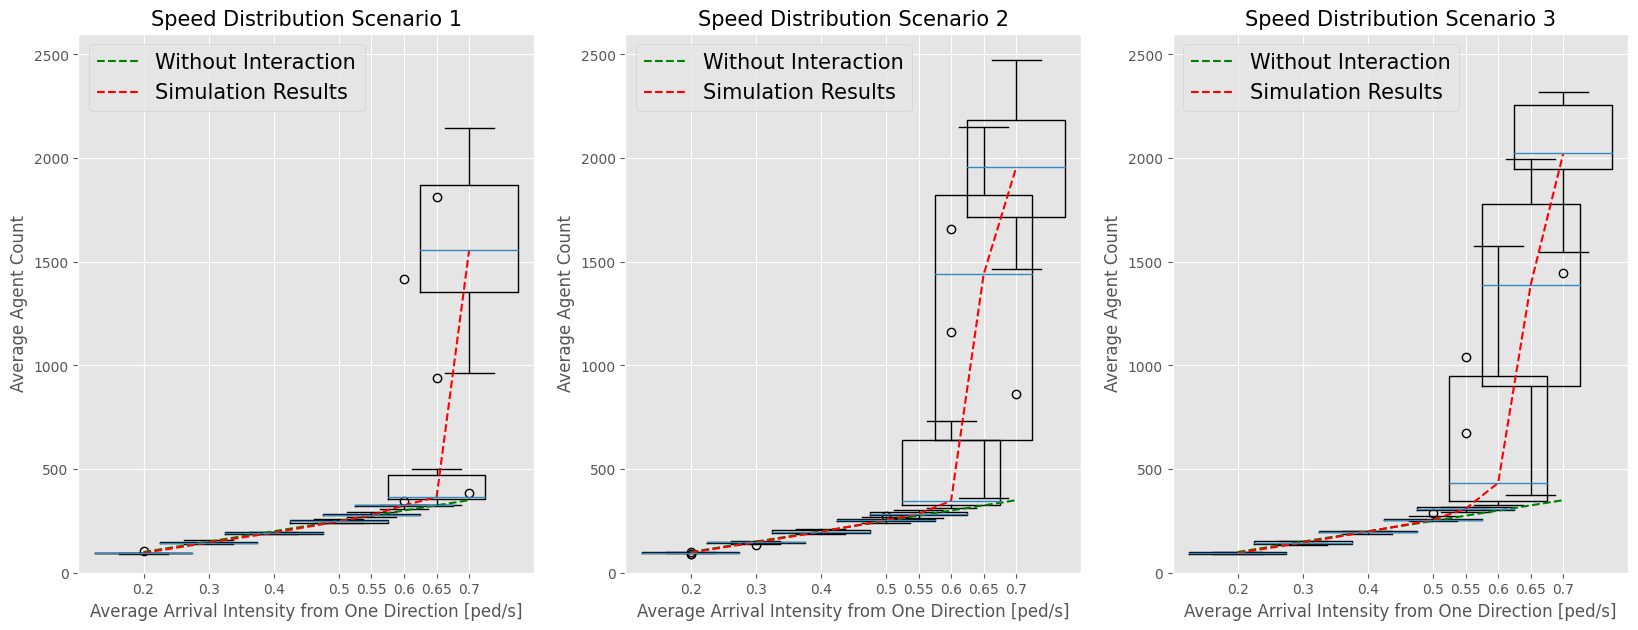

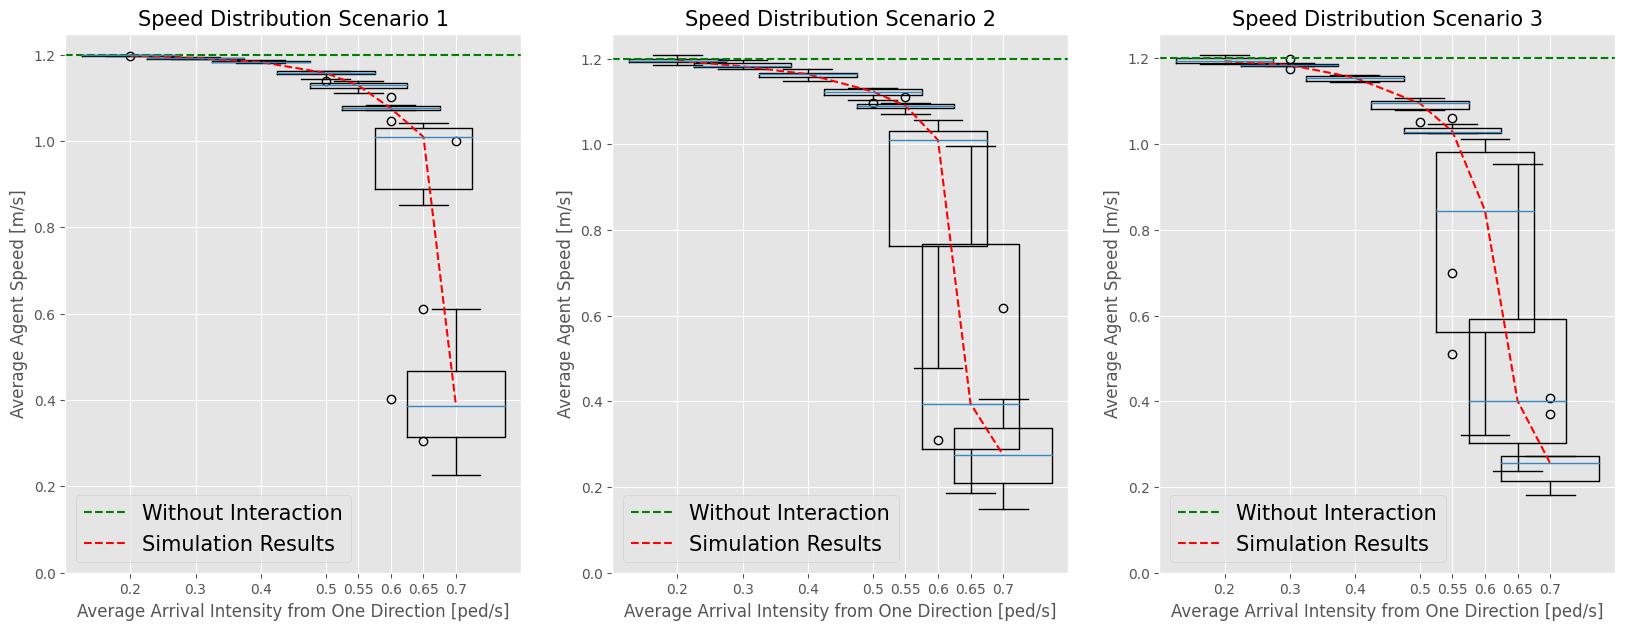

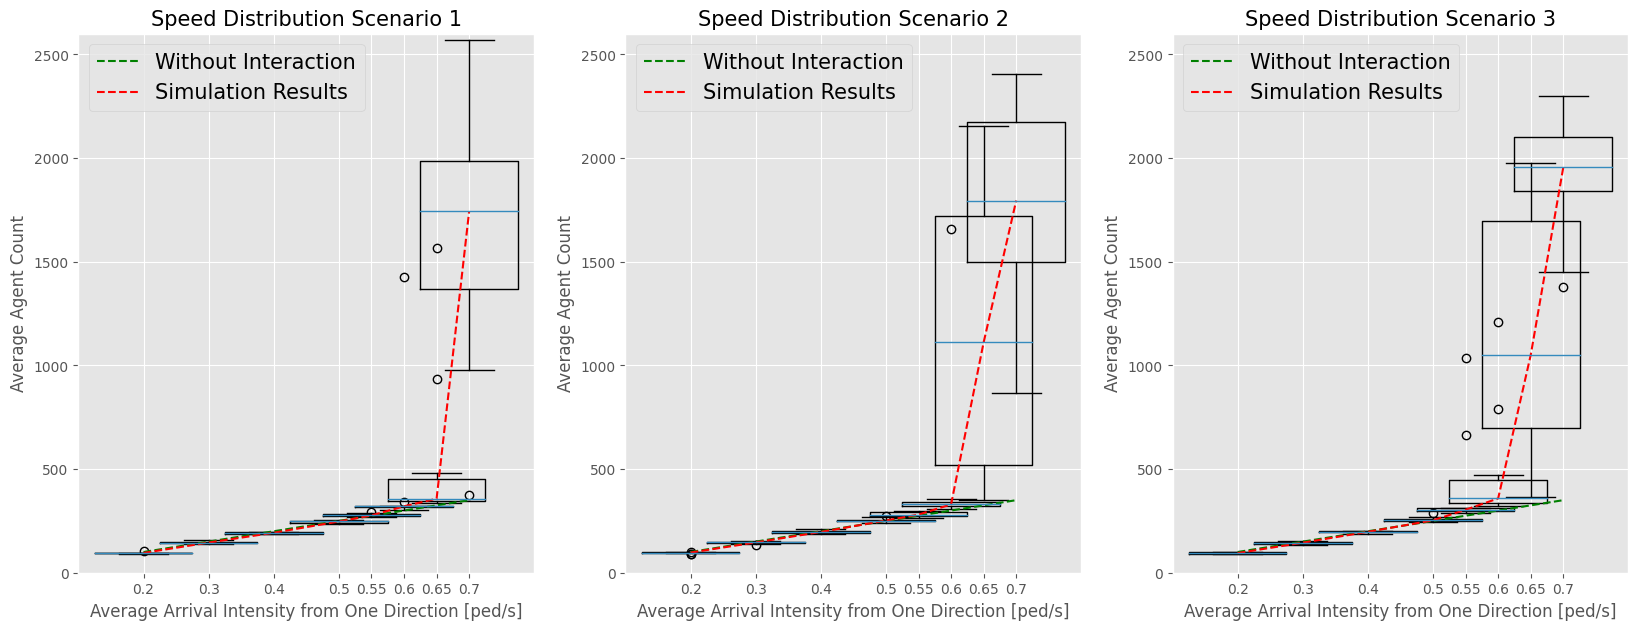

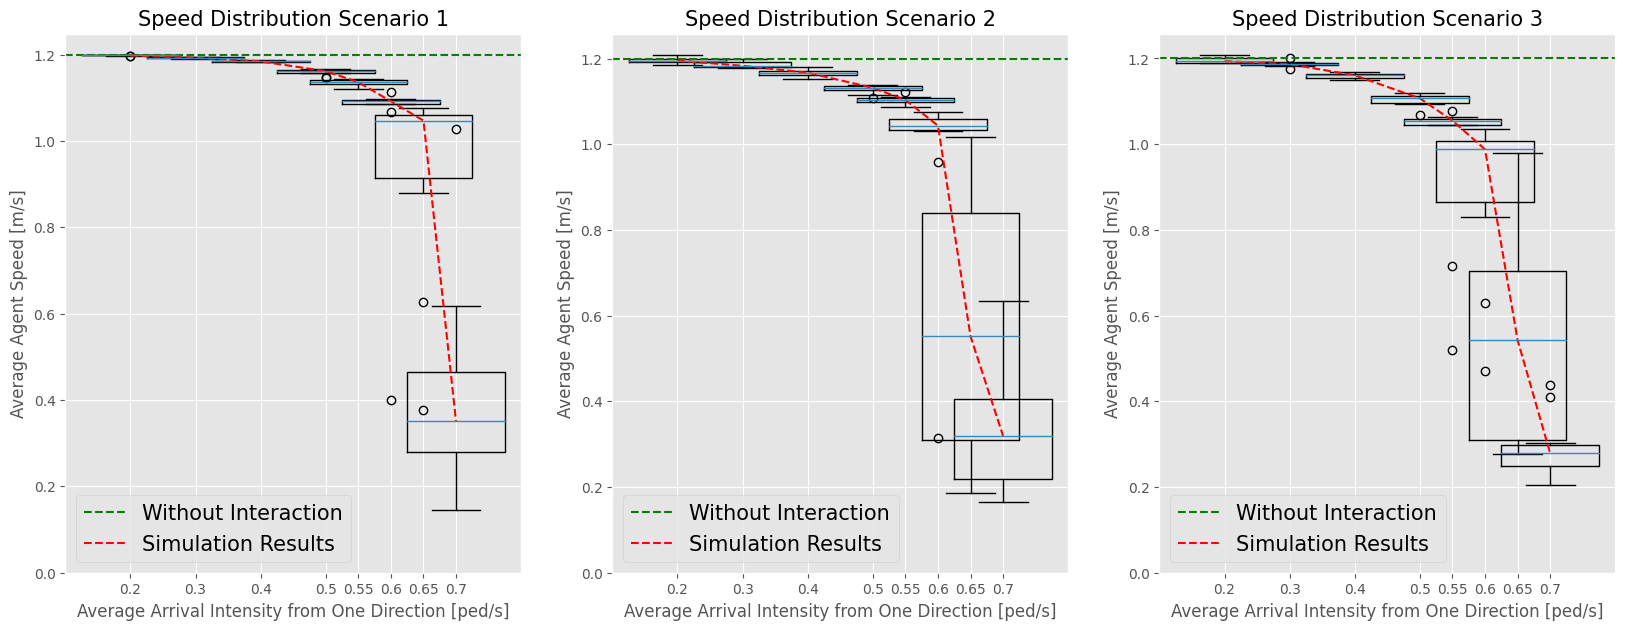

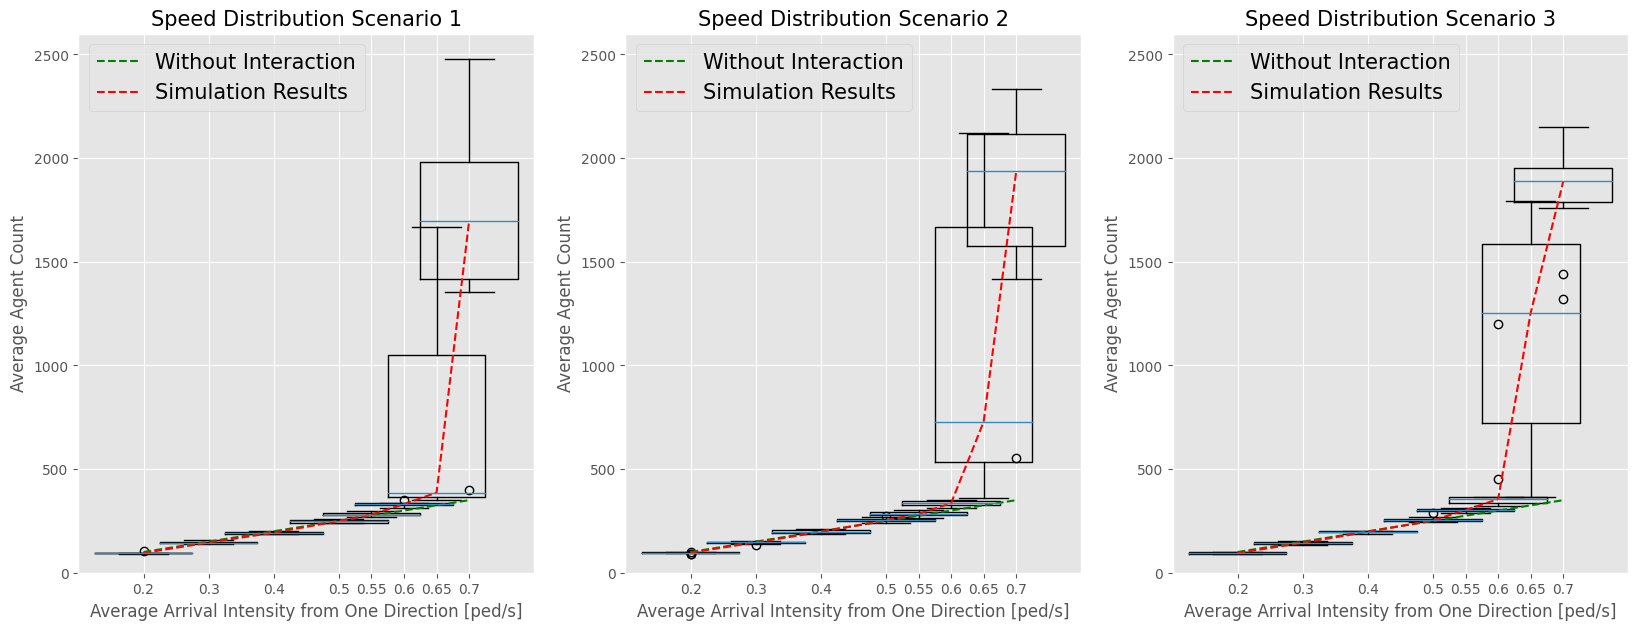

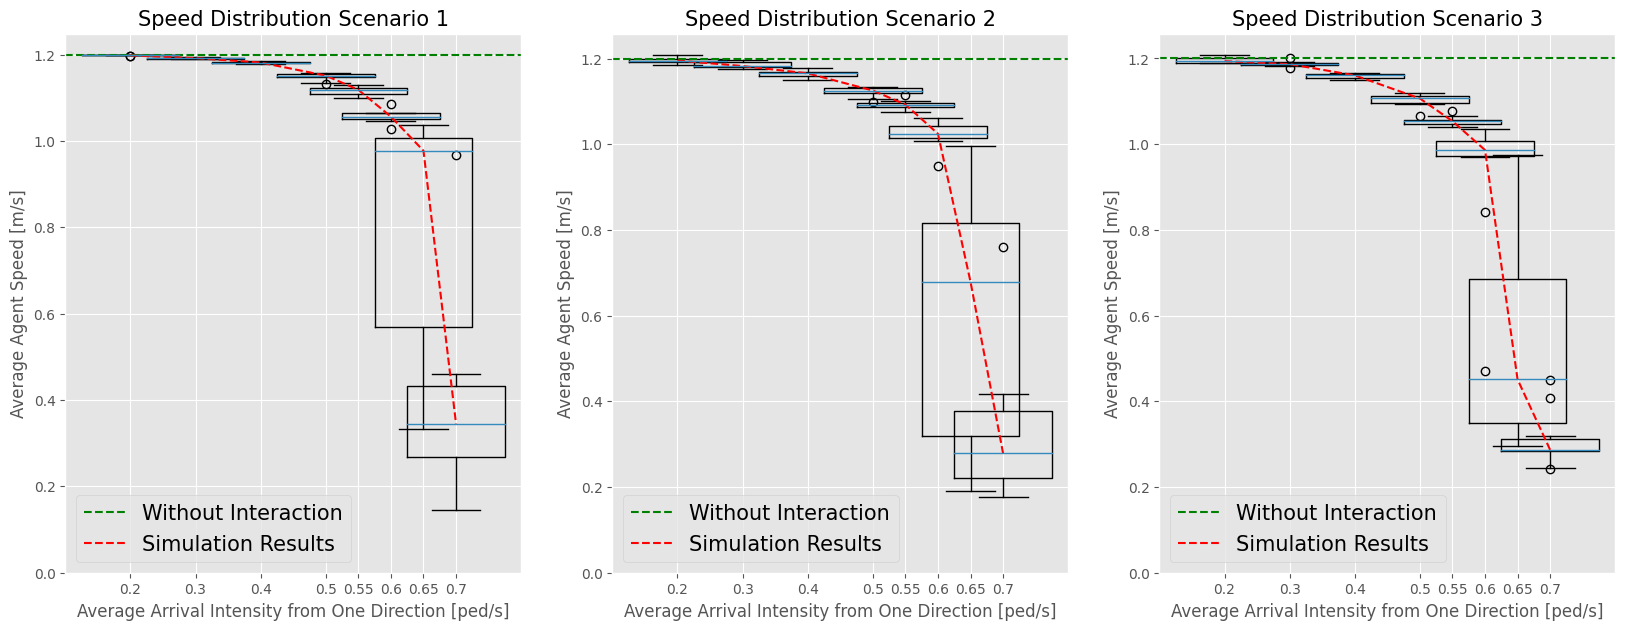

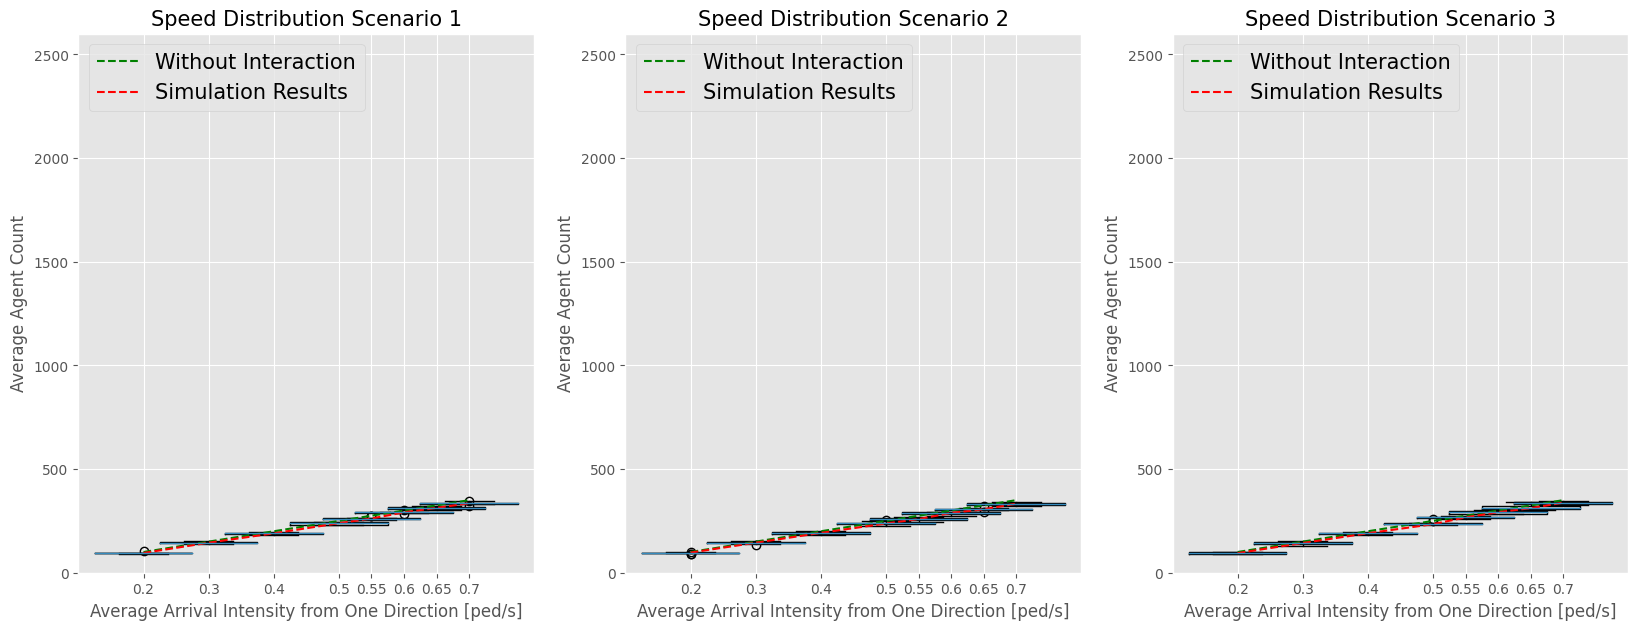

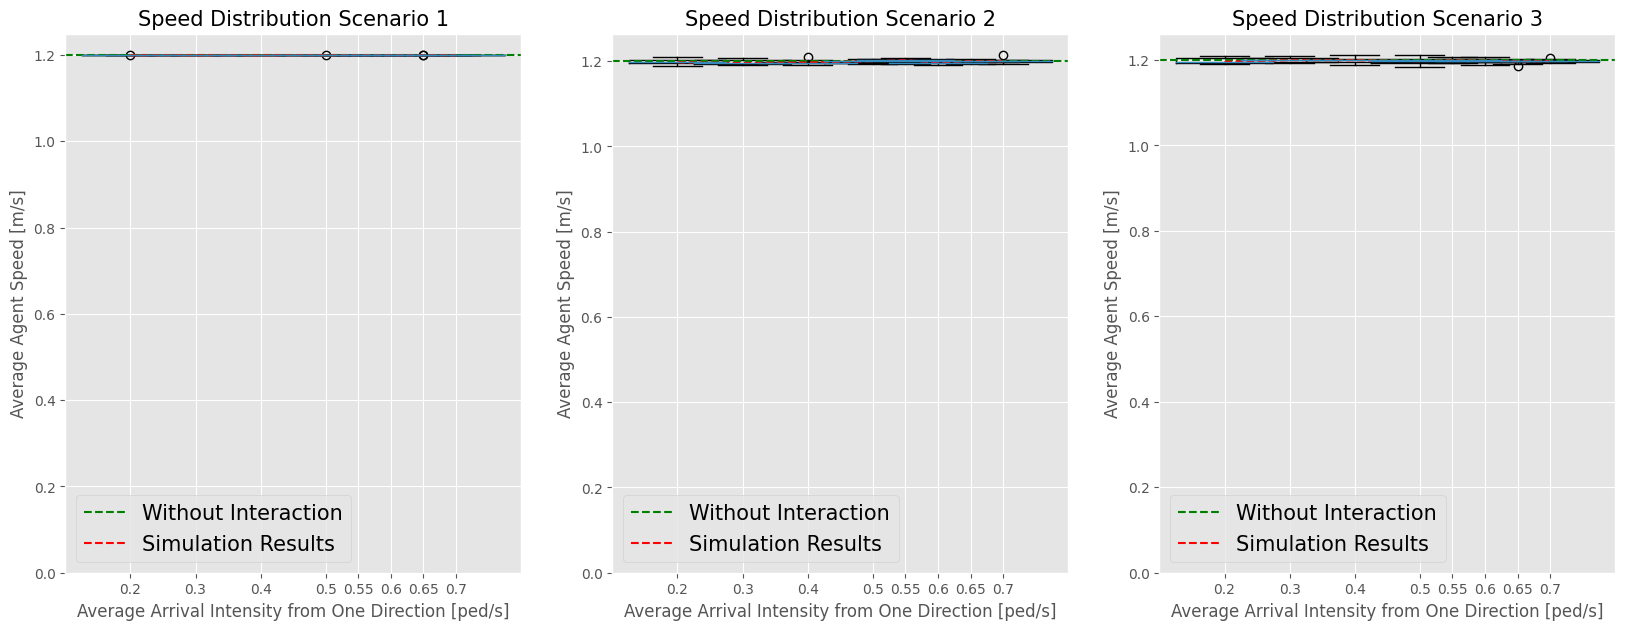

In [56]:
sim_file = '../simulation'
param_dir = '../params/'
file_type_cnt = '.transportB'
file_type_velo = '.transportB_end'
iter_cnt = 10
timestep = 0.1
run = False
kernels = [
    "diraq"
    ,"triang1"
    ,"triang2"
    ,"free"
]
param_types = ["homo-homo", "homo-hetero", "hetero-hetero"]

for kername in kernels[:]:
    arr = []
    # keys are param_types
    data_cnt = dict()
    data_velo = dict()
    for param_type in param_types[:]:
        log_dir = f'../log/{param_type}/'
        
        data_cnt[param_type] = dict()
        data_velo[param_type] = dict()

        for param in [f'{param_type}{i}' for i in range(1, 9)]:
            dist, lam, velo = extract_params(param_dir + param)
            data_cnt[param_type][lam] = list()
            data_velo[param_type][lam] = list()
            for it in range(iter_cnt):
                dir = log_dir + param + f'/{str(it)}/'
                file_cnt = f'{dir}{kername}{file_type_cnt}'
                file_velo = f'{dir}{kername}{file_type_velo}'

                static_start, static_end = read_static(file_velo)

                data_cnt[param_type][lam].append(read_cnt(file_cnt, static_start, static_end, timestep))
                data_velo[param_type][lam].append(read_velo(file_velo, dist, static_start, static_end, timestep))

    plot_macro_(data_cnt, data_velo, kername, dist, velo, False, param_types)
                

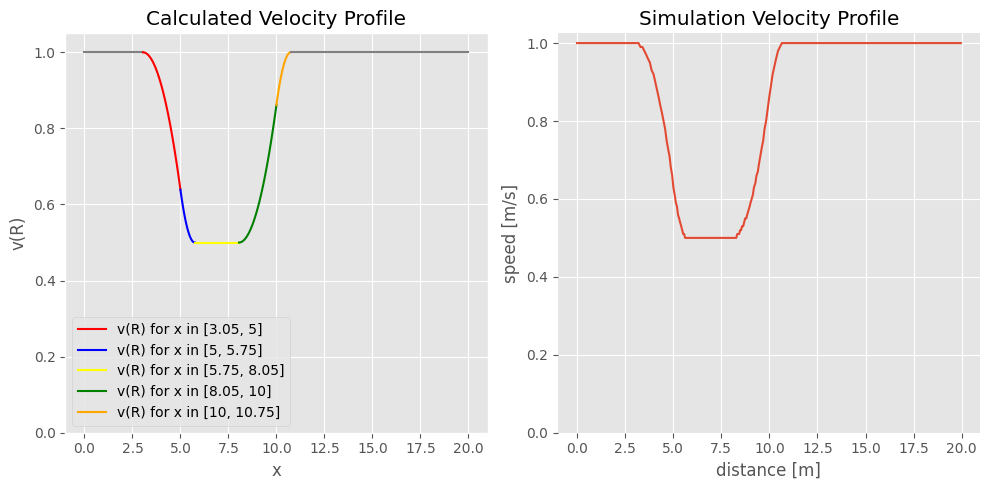

In [39]:
import numpy as np
import matplotlib.pyplot as plt

vels1, pos1, _, _ = read1_1("log/analysis/1dyn-1static/0/triang1")

def v1(x):
    return 1 + 0.5 * (-1.76686 + 1.15859 * x - 0.189934 * x**2)

def v2(x):
    return 1 + 0.5 * (15.3272 - 5.67901 * x + 0.493827 * x**2)

def v3(x):
    return 0.5 + 0 * x

def v4(x):
    return 1 - 0.5 * (-11.3082 + 3.05793 * x - 0.189934 * x**2)

def v5(x):
    return 1 - 0.5 * (57.0679 - 10.6173 * x + 0.493827 * x**2)

x0 = np.linspace(0, 3.05, 100)
x1 = np.linspace(3.05, 5, 100)
x2 = np.linspace(5, 5.75, 100)
x3 = np.linspace(5.75, 8.05, 100)
x4 = np.linspace(8.05, 10, 100)
x5 = np.linspace(10, 10.75, 100)
x6 = np.linspace(10.75, 20, 300)

y1 = v1(x1)
y2 = v2(x2)
y3 = v3(x3)
y4 = v4(x4)
y5 = v5(x5)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(x0, np.ones(len(x0)), color="grey")
ax[0].plot(x1, y1, label='v(R) for x in [3.05, 5]', color="red")
ax[0].plot(x2, y2, label='v(R) for x in [5, 5.75]', color="blue")
ax[0].plot(x3, y3, label='v(R) for x in [5.75, 8.05]', color="yellow")
ax[0].plot(x4, y4, label='v(R) for x in [8.05, 10]', color="green")
ax[0].plot(x5, y5, label='v(R) for x in [10, 10.75]', color="orange")
ax[0].plot(x6, np.ones(len(x6)), color="grey")

ax[0].set_xlabel("x")
ax[0].set_ylabel('v(R)')
ax[0].set_title('Calculated Velocity Profile')
ax[0].legend()
ax[0].grid(True)
ax[0].set_ylim(0, 1.05)

ax[1].grid(True)
ax[1].plot(pos1, vels1)
ax[1].set_xlabel('distance [m]')
ax[1].set_ylabel('speed [m/s]')
ax[1].set_yticks([x for x in np.arange(0, 1 + 0.2, 0.2)])
ax[1].set_title('Simulation Velocity Profile')

for spine in ax[1].spines.values():
    spine.set_visible(False)

plt.tight_layout()

plt.savefig("validation.pdf")
plt.savefig("validation.pdf")


P(x) = 0.000000000000000 * x^0 + 0.000487804878049 * x^1 + 0.000000715447154 * x^2 + -0.000000001387534 * x^3 + 0.000000000000463 * x^4

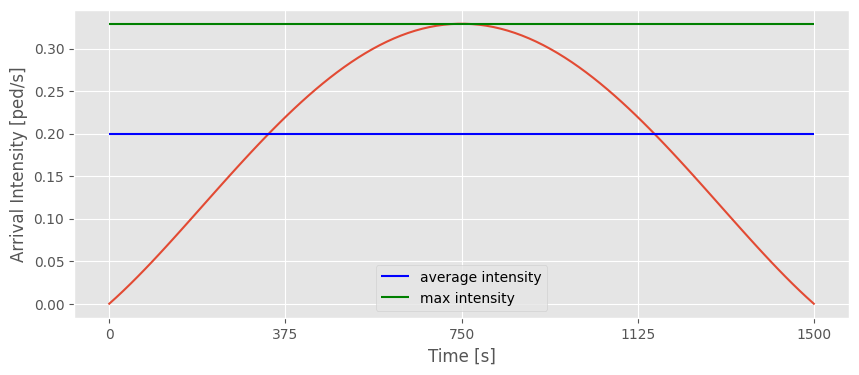

P(x) = 0.000000000000000 * x^0 + 0.001882352941176 * x^1 + -0.000003450980392 * x^2 + 0.000000002300654 * x^3 + -0.000000000000558 * x^4

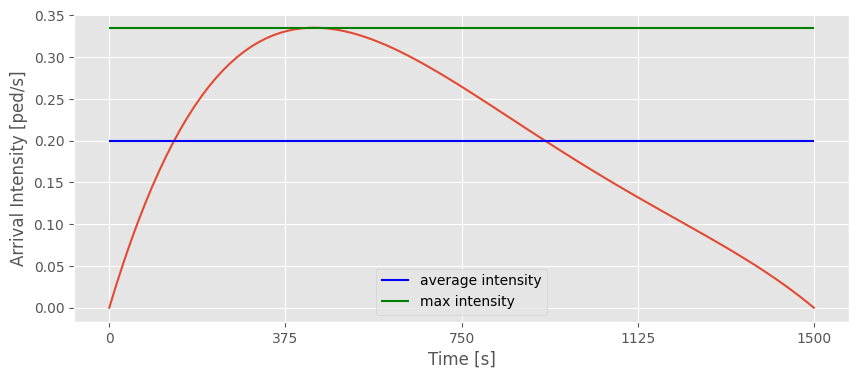

P(x) = 0.000000000000000 * x^0 + 0.000470588235294 * x^1 + -0.000000627450980 * x^2 + 0.000000001045752 * x^3 + -0.000000000000558 * x^4

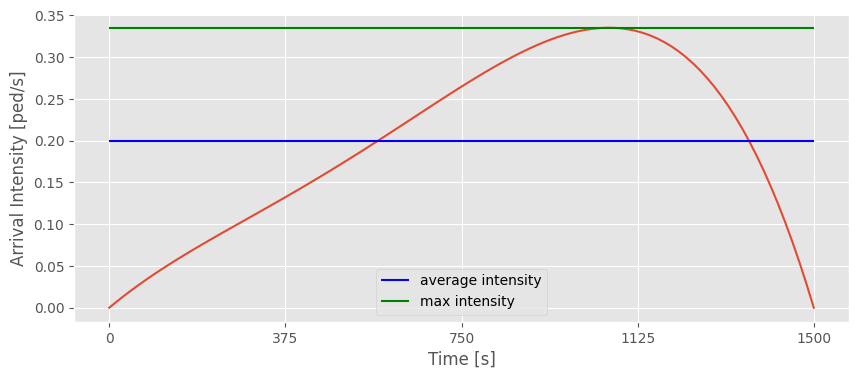

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

t_max = 1500

def PolynomialCoeffs (val):
    return np.array([val**i for i in range(0, 5)])

def Polynomial(arr, coeffs):
    return np.array([np.sum([k * x**i for i, k in enumerate(coeffs)]) for x in arr ])

def Polynomial1(x, coeffs):
    return np.sum([k * x**i for i, k in enumerate(coeffs)])

def Riem(polynom, lo, hi):
    return np.sum([hi**(i + 1) * c / (i + 1) for i, c in enumerate(polynom)]) - np.sum([lo**(i + 1) * c / (i + 1) for i, c in enumerate(polynom)])

def GetMax(coeffs):
    pass

tt = np.array([0, t_max/4, t_max/2, 3 * t_max/4, t_max])

A = []
for time in tt:
    A = np.vstack((A, PolynomialCoeffs(time))) if len(A) != 0 else np.array([PolynomialCoeffs(time)])

bb = np.array([
    np.array([0, 2/3, 1, 2/3, 0]),
    np.array([0, 1, 4/5, 2/5, 0]),
    np.array([0, 2/5, 4/5, 1, 0])
    ]
)

ll = np.array( [
    0.2,
    0.3,
    0.4, 
    0.5, 
    0.55, 
    0.6, 
    0.65, 
    0.7
] )

ps = dict() # lambdas
for lam in ll:
    ps[lam] = dict() # shapes

x_values = np.linspace(0, t_max, 100)

PRINT = True

for numm, lam in enumerate(ll[:1]):
    for num, b in enumerate(bb[:]):
        coeffs = np.linalg.solve(A, b)
        scale = (lam * t_max) / Riem(coeffs, 0, t_max)
        coeffs *= scale
        
        ps[lam][num] = coeffs
        
        result = minimize_scalar(lambda x: -Polynomial1(x, ps[lam][num]), bounds=(0, t_max), method='bounded')
        max_value = -result.fun  # hodnota funkce v maximu

        if PRINT:
            print("P(x) = ", end="")
            for i, k in enumerate(coeffs):
                print(f"{k:.15f} * x^{i}", end=" + " if i != len(coeffs) - 1 else "")
            y_values = Polynomial(x_values, coeffs)

            # Vykreslení grafu
            plt.figure(figsize=(10, 4))
            plt.plot(x_values, y_values)
            plt.hlines([lam], 0, t_max, colors=["blue"], label="average intensity")
            plt.hlines([max_value], 0, t_max, colors=["green"], label="max intensity")
            plt.xticks(tt)
            plt.xlabel('Time [s]')
            plt.ylabel('Arrival Intensity [ped/s]')
            plt.grid(True)
            plt.legend(loc=8)
            plt.savefig(f"intensity{num}.pdf")
            plt.show()

In [16]:
for i, lam in enumerate(ll):
    for num in range(3):
        result = minimize_scalar(lambda x: -Polynomial1(x, ps[lam][num]), bounds=(0, t_max), method='bounded')
        max_value = -result.fun  # hodnota funkce v maximu

        with open(f"../params/{num+1}-nonhomo{i+1}", "w") as file:
            file.write(f"log/{num+1}-nonhomo/{num+1}-nonhomo{i+1}/\n")
            file.write("0.1\n") # [double] timestep
            file.write("0.75\n")
            file.write("1.2\n")
            file.write("0.26\n")
            file.write("0.45\n")
            file.write("4\n")
            file.write("14\n")
            file.write("0\n")
            file.write("5\n")
            file.write("0\n")
            file.write("5\n")
            file.write("0.75\n")
            file.write("1.95\n")
            file.write("150\n")
            file.write("0\n")
            file.write("0\n")
            file.write("1500\n")
            file.write("1500\n")
            
            if num == 0:
                file.write(f"-{max_value}\n")
                file.write(f"-{max_value}\n")

            if num == 1:
                file.write(f"-{max_value}\n")
                file.write(f"-{max_value}\n")

            if num == 2:
                file.write(f"-{max_value}\n")
                file.write(f"{lam}\n")

            file.write("0\n")
            if num == 0:
                for coef in ps[lam][0][::-1]:
                    file.write(f"{coef:.15f} ")
                file.write("\n")
                for coef in ps[lam][0][::-1]:
                    file.write(f"{coef:.15f} ")
                file.write("\n")

            if num == 1:
                for coef in ps[lam][1][::-1]:
                    file.write(f"{coef:.15f} ")
                file.write("\n")
                for coef in ps[lam][2][::-1]:
                    file.write(f"{coef:.15f} ")
                file.write("\n")
                
            if num == 2:
                for coef in ps[lam][1][::-1]:
                    file.write(f"{coef:.15f} ")
                file.write("\n")
                for coef in ps[lam][0][::-1]:
                    file.write(f"{coef:.15f} ")
                file.write("\n")

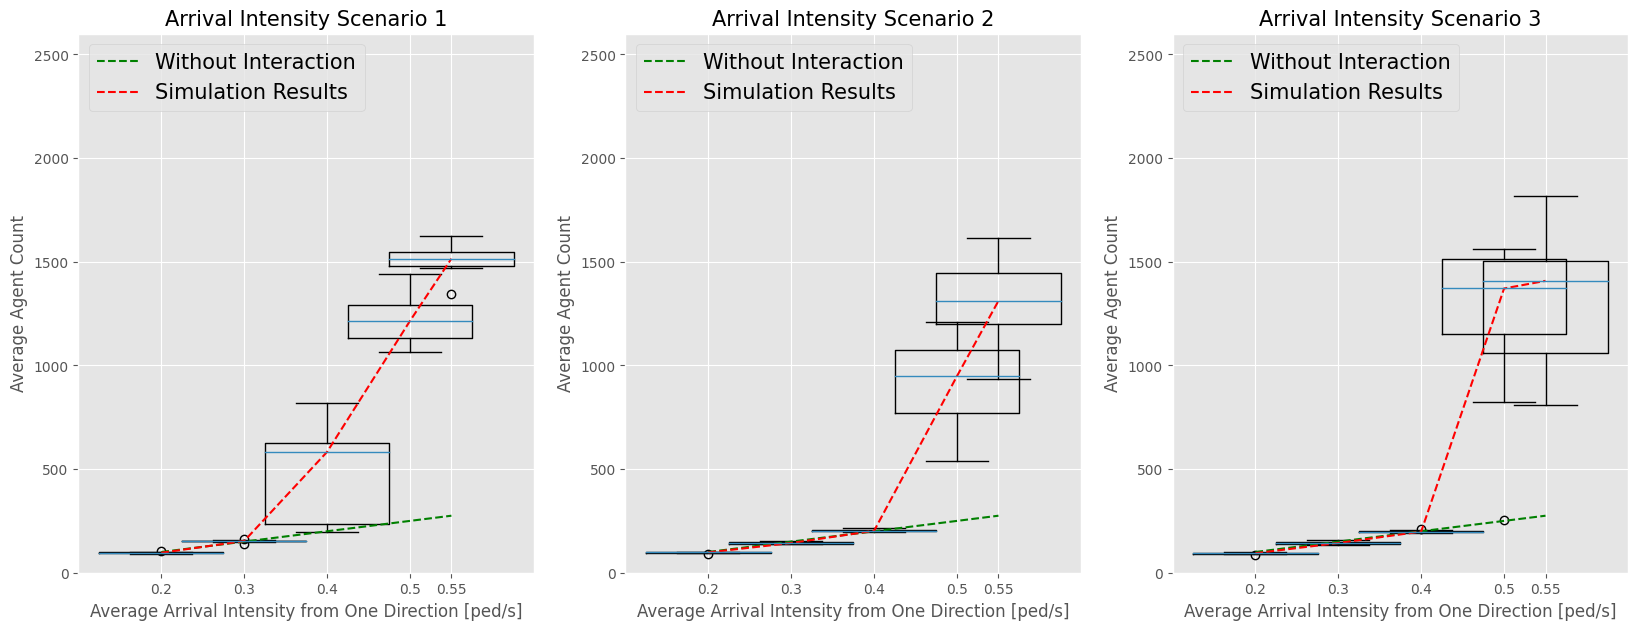

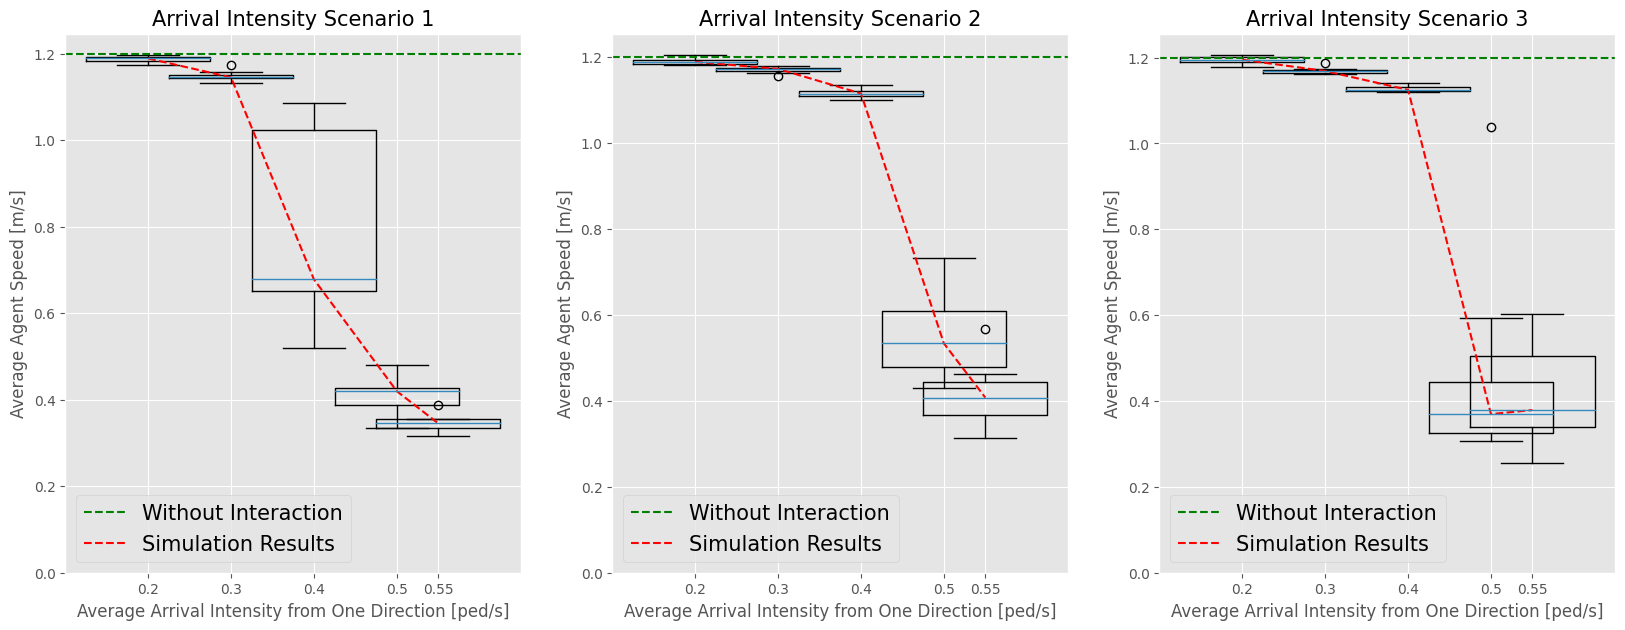

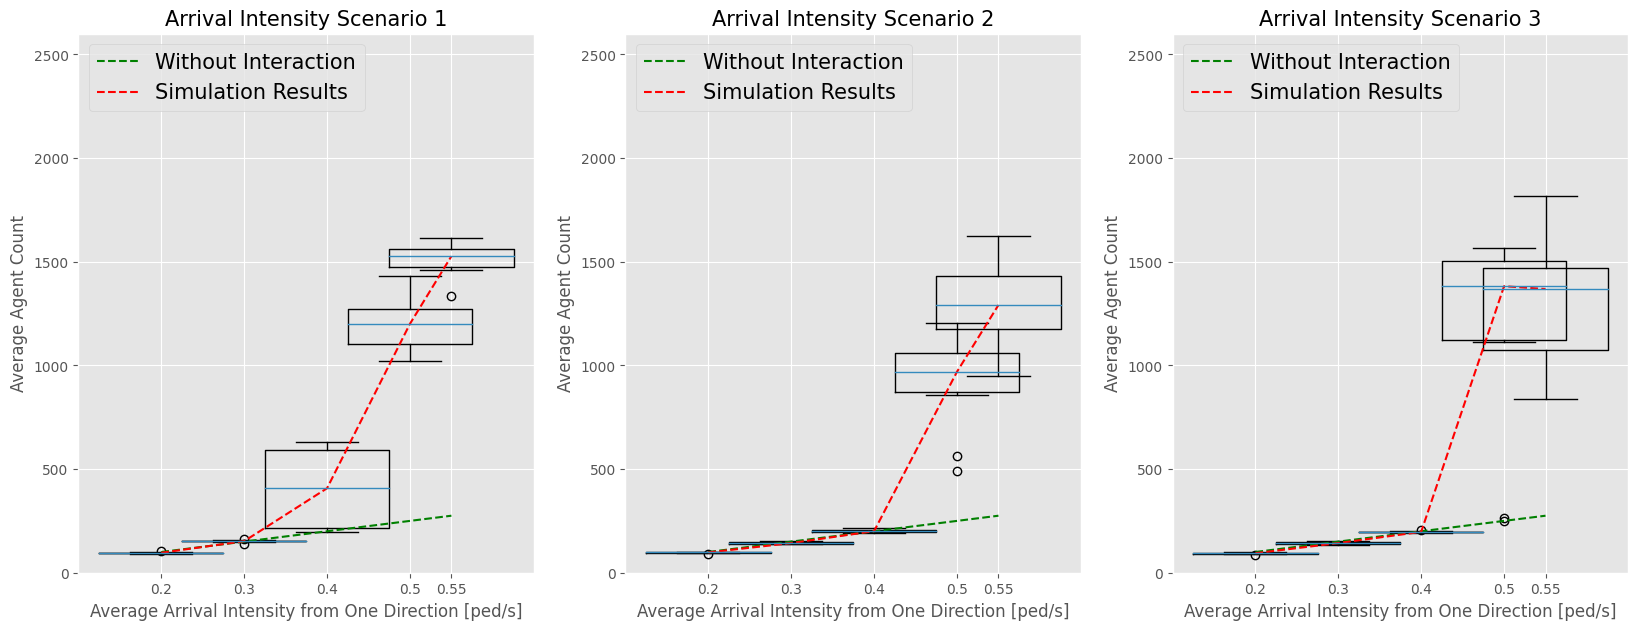

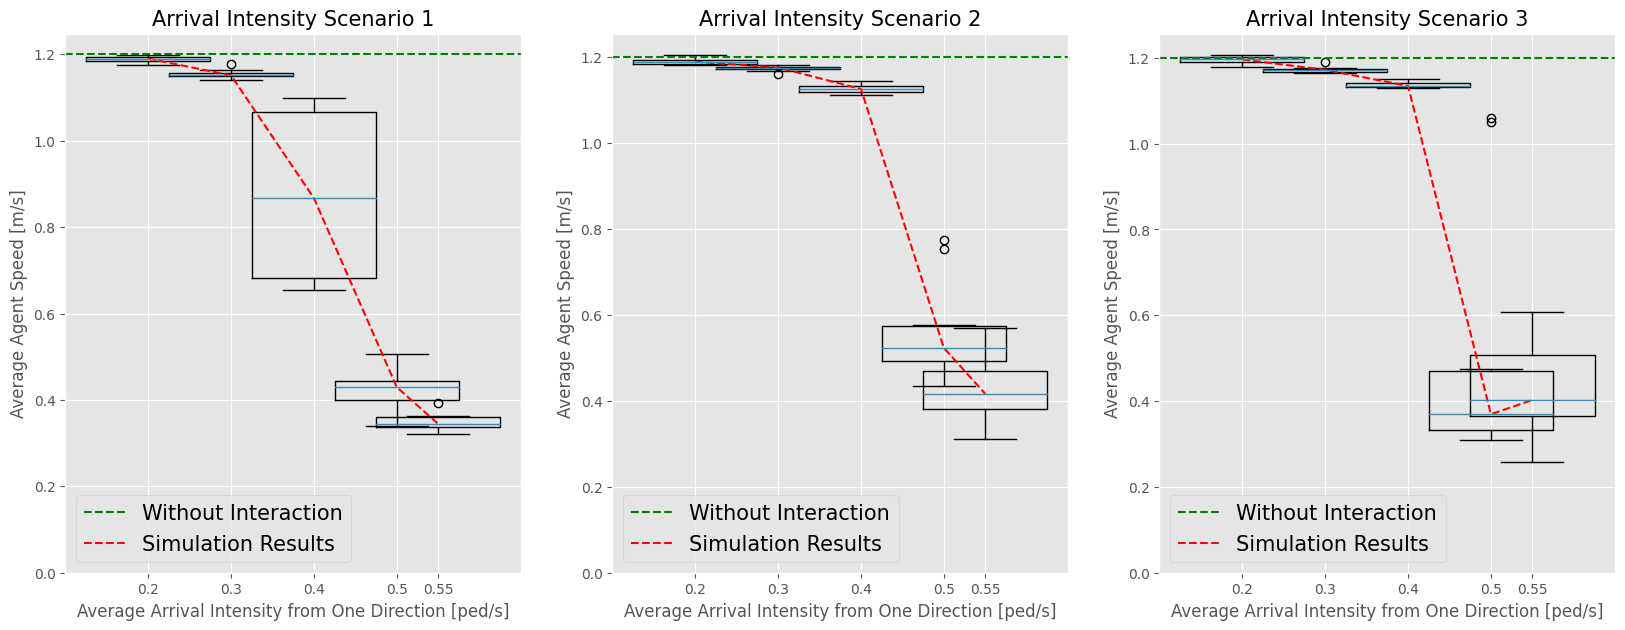

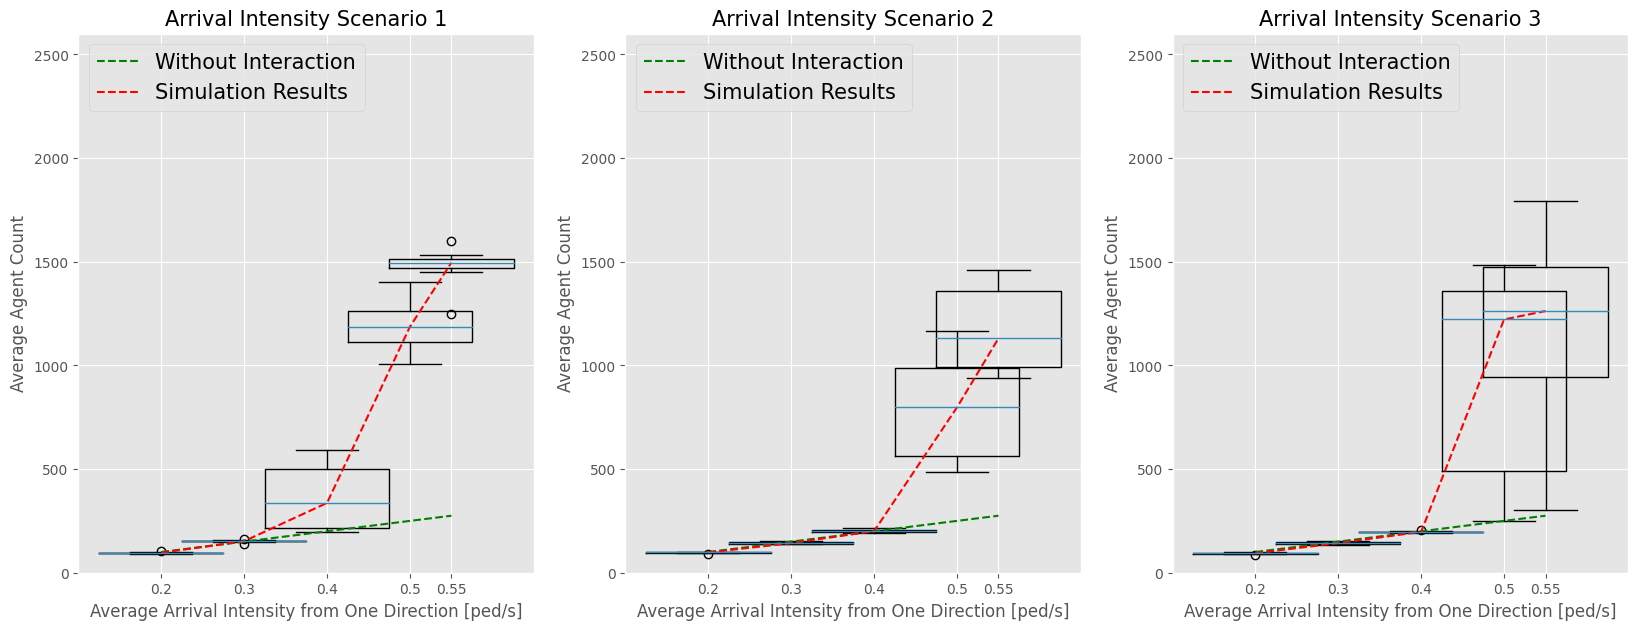

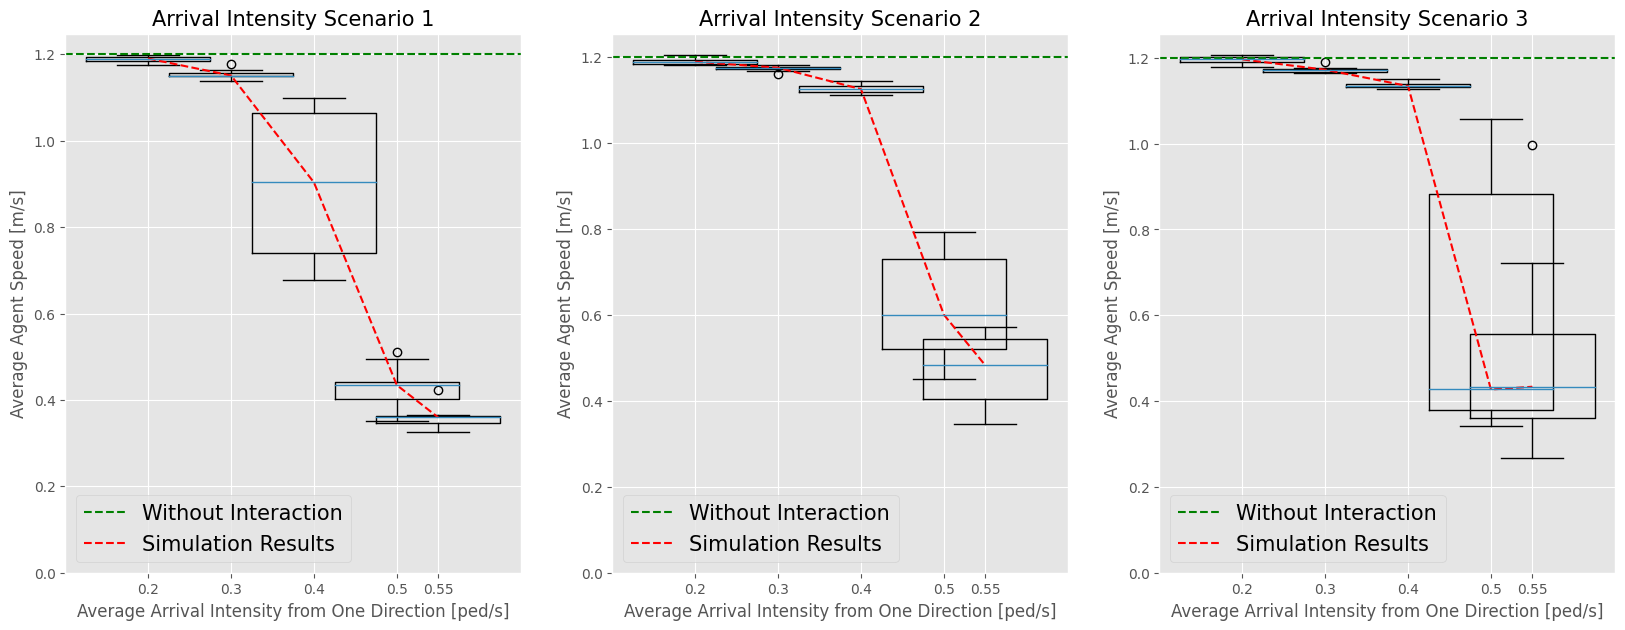

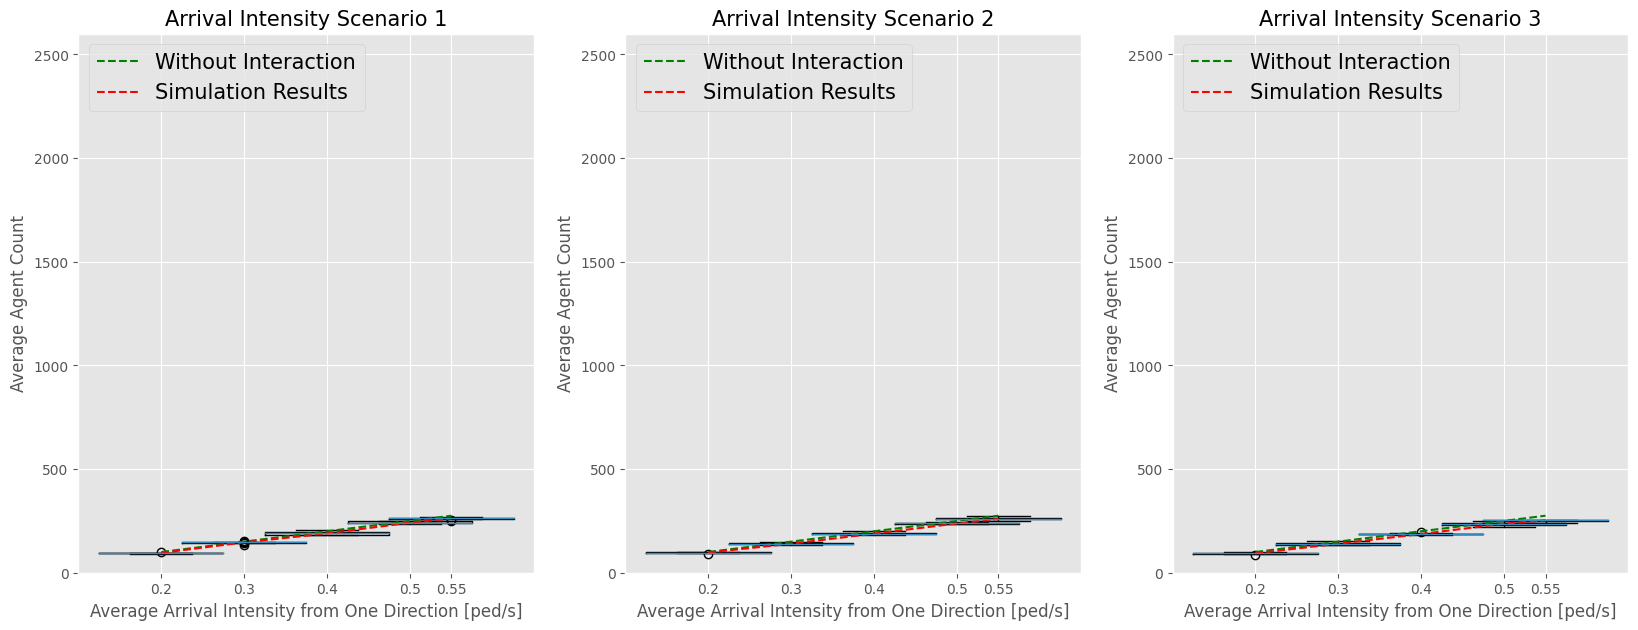

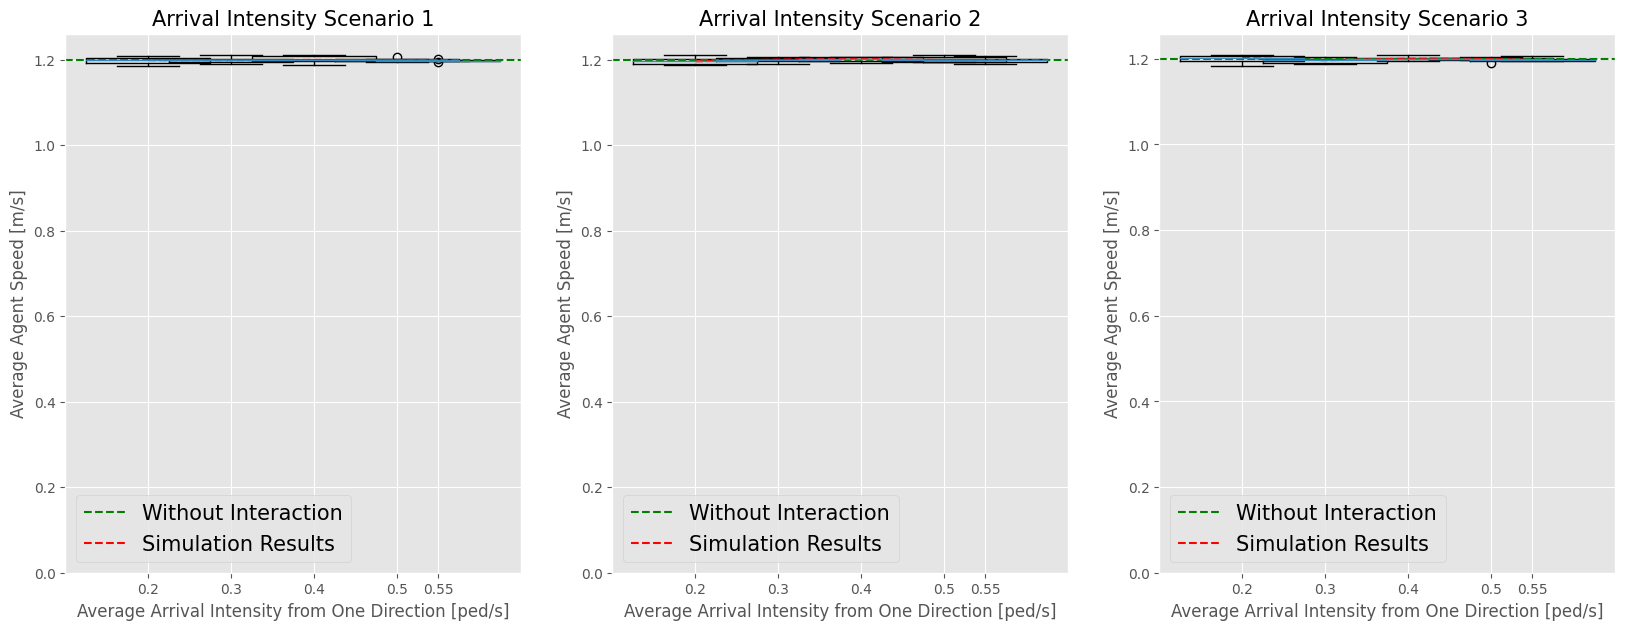

In [57]:
sim_file = '../simulation'
param_dir = '../params/'
file_type_cnt = '.transportB'
file_type_velo = '.transportB_end'
iter_cnt = 10
timestep = 0.1
run = False
kernels = [
    "diraq"
    ,"triang1"
    ,"triang2"
    ,"free"
]
param_types = ["1-nonhomo", "2-nonhomo", "3-nonhomo"]
lambdas = [0.2, 0.3, 0.4, 0.5, 0.55] #, 0.5, 0.55, 0.6, 0.65, 0.7]

for kername in kernels[:]:
    arr = []
    # keys are param_types
    data_cnt = dict()
    data_velo = dict()
    for param_type in param_types[:]:
        log_dir = f'../log/{param_type}/'
        
        # keys are lambdas
        data_cnt[param_type] = dict()
        data_velo[param_type] = dict()

        for i, lam in enumerate(lambdas):
            param = f'{param_type}{i+1}'
            dist, _, velo = extract_params(param_dir + param)
            data_cnt[param_type][lam] = list()
            data_velo[param_type][lam] = list()
            for it in range(iter_cnt):
                dir = log_dir + param + f'/{str(it)}/'
                file_cnt = f'{dir}{kername}{file_type_cnt}'
                file_velo = f'{dir}{kername}{file_type_velo}'

                static_start, static_end = read_static(file_velo, True)

                data_cnt[param_type][lam].append(read_cnt(file_cnt, static_start, static_end, timestep))
                data_velo[param_type][lam].append(read_velo(file_velo, dist, static_start, static_end, timestep))

    plot_macro_(data_cnt, data_velo, kername, dist, velo, False, param_types, "nonhomo")

In [58]:
def plot_together(d_cnt: dict, d_velo: dict, max_lams, ker: str, dist: float, velo: float, param_types: list, ax1, ax2, maxx: bool):
    colors = ['brown', 'green', 'blue', 'orange', 'purple', 'red', 'pink', 'gray']

    for i, par in enumerate(param_types):
        data_cnt = d_cnt[par]
        if maxx:
            lams = list(np.abs(x) for x in max_lams[par].values())
        else:
            lams = list(float(x) for x in data_cnt.keys())
        ax1.plot(lams, list(data_cnt.values()), label=par, marker="o", linestyle="-", color=colors[i])

    ax1.set_ylim(0, 2200)
    ax1.set_title(f'{ker.capitalize()} Kernel', size=FONTSIZE)
    if maxx:
        ax1.set_xlabel('Maximum Arrival Intensity')
    else:
        ax1.set_xlabel('Average Arrival Intensity')
    ax1.set_ylabel('Average Agent Count')
    ax1.plot(lams, [4 * l * dist / velo for l in lams], marker='', linestyle='--', color='black', label='without interaction')
    ax1.legend()
    ax1.grid(True)
    ax1.legend(["Speed Distribution Scenario 1",
                "Speed Distribution Scenario 2",
                "Speed Distribution Scenario 3",
                "Arrival Intensity Scenario 1",
                "Arrival Intensity Scenario 2",
                "Arrival Intensity Scenario 3",
                "Without Interaction"],
                loc = "upper left")

    for i, par in enumerate(param_types):
        data_velo = d_velo[par]
        if maxx:
            lams = list(np.abs(x) for x in max_lams[par].values())
        else:
            lams = list(float(x) for x in data_velo.keys())
        ax2.plot(lams, list(data_velo.values()), label=par, marker="o", linestyle="-", color=colors[i])

    ax2.set_ylim(0, max(max(ddd.values()) for ddd in d_velo.values()) + 0.1)
    ax2.set_title(f'{ker.capitalize()} Kernel', size=FONTSIZE)
    if maxx:
        ax2.set_xlabel('Average Arrival Intensity')
    else:
        ax2.set_xlabel('Maximum Arrival Intensity')
    ax2.set_ylabel('Average Agent Speed')
    ax2.plot(lams, [velo for l in lams], marker='', linestyle='--', color='black', label='without interaction')
    ax2.legend(["Speed Distribution Scenario 1",
                "Speed Distribution Scenario 2",
                "Speed Distribution Scenario 3",
                "Arrival Intensity Scenario 1",
                "Arrival Intensity Scenario 2",
                "Arrival Intensity Scenario 3",
                "Without Interaction"])
    ax2.grid(True)
    

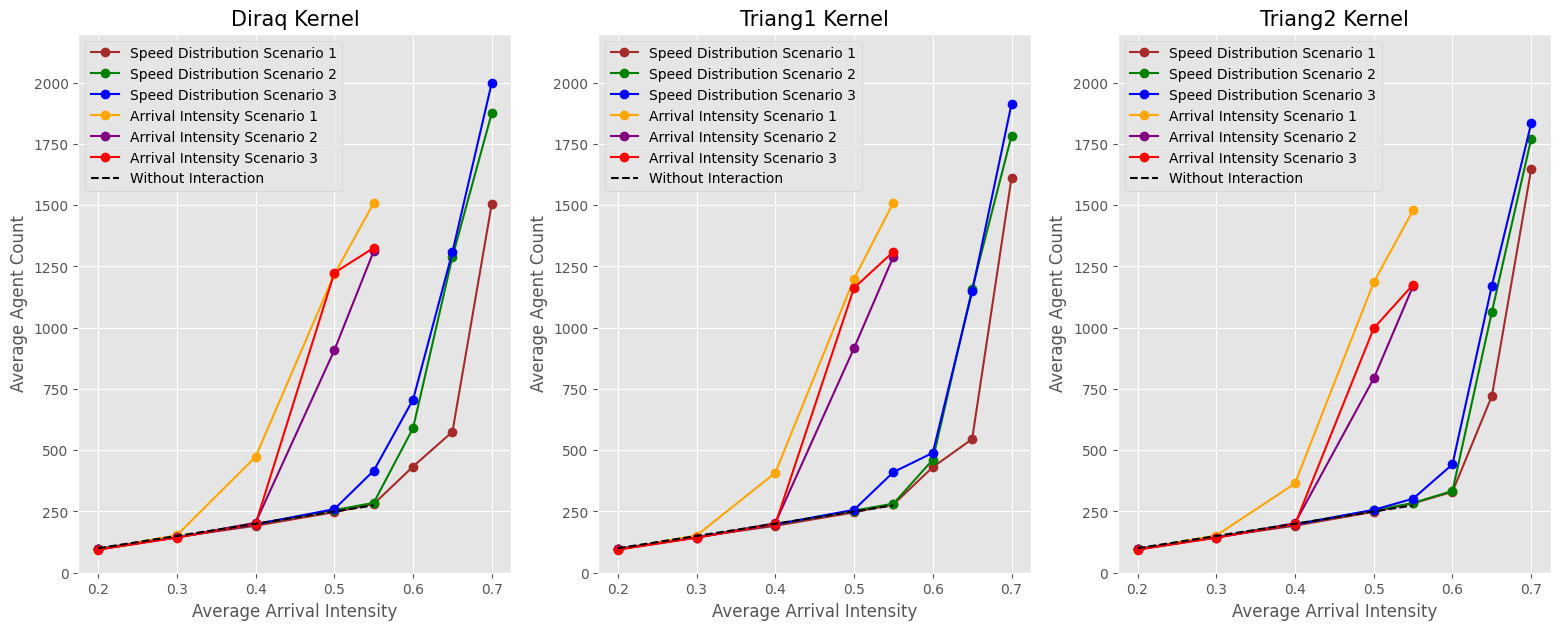

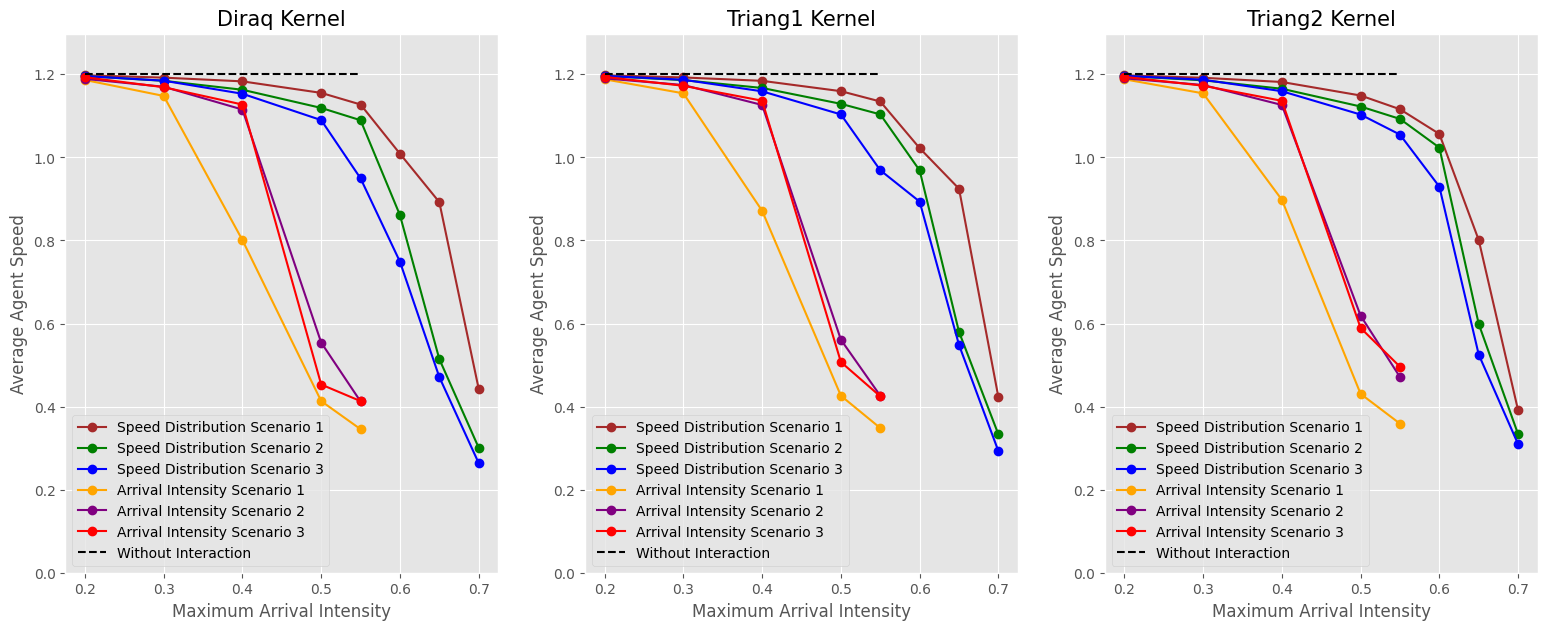

In [59]:
sim_file = '../simulation'
param_dir = '../params/'
file_type_cnt = '.transportB'
file_type_velo = '.transportB_end'
iter_cnt = 10
timestep = 0.1
run = False
kernels = [
    "diraq"
    ,"triang1"
    ,"triang2"
    # ,"free"
]
param_types = ["homo-homo", "homo-hetero", "hetero-hetero", "1-nonhomo", "2-nonhomo", "3-nonhomo"]
lambdas = [0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7]

fig1, ax1 = plt.subplots(1, 3, figsize=(19, 7))
fig2, ax2 = plt.subplots(1, 3, figsize=(19, 7))
for kernum, kername in enumerate(kernels[:]):
    arr = []
    data_cnt = dict()
    data_velo = dict()
    max_lams = dict()
    for parnum, param_type in enumerate(param_types[:]):
        log_dir = f'../log/{param_type}/'
        data_cnt[param_type] = dict()
        data_velo[param_type] = dict()
        max_lams[param_type] = dict()
        for i, lam in enumerate(lambdas[:(5 if parnum > 2 else len(lambdas))]):
            param = f'{param_type}{i+1}'
            dist, max_lam, velo = extract_params(param_dir + param)
            data_cnt[param_type][lam] = 0
            data_velo[param_type][lam] = 0
            max_lams[param_type][lam] = max_lam
            for it in range(iter_cnt):
                dir = log_dir + param + f'/{str(it)}/'
                file_cnt = f'{dir}{kername}{file_type_cnt}'
                file_velo = f'{dir}{kername}{file_type_velo}'
                static_start, static_end = read_static(file_velo, parnum > 2)
                data_cnt[param_type][lam] += (read_cnt(file_cnt, static_start, static_end, timestep))
                data_velo[param_type][lam] += (read_velo(file_velo, dist, static_start, static_end, timestep))
            
            data_cnt[param_type][lam] /= iter_cnt
            data_velo[param_type][lam] /= iter_cnt

    plot_together(data_cnt, data_velo, max_lams, kername, dist, velo, param_types, ax1[kernum], ax2[kernum], False)
    
    
fig1.savefig(f'count-experiments-avg.pdf')
fig2.savefig(f'velo-experiments-avg.pdf')


In [37]:
def plot_together_(d_cnt: dict, d_velo: dict, param_type: str, dist: float, velo: float, kers: list, ax1, ax2, figname):
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']

    for i, ker in enumerate(kers):
        data_cnt = d_cnt[ker]
        lams = list(float(x) for x in data_cnt.keys())
        ax1.plot(lams, list(data_cnt.values()), label=ker, marker="o", linestyle="-", color=colors[i], alpha=0.7)

    ax1.set_ylim(0, 2200)
    ax1.set_title(f'{figname}', size=FONTSIZE)
    ax1.set_xlabel('Average Arrival Intensity')
    ax1.set_ylabel('Average Agent Count')
    ax1.plot(lams, [4 * l * dist / velo for l in lams], marker='', linestyle='--', color='black', label='without interaction')
    ax1.legend()
    ax1.grid(True)
    ax1.legend(loc="upper left")

    for i, ker in enumerate(kers):
        data_velo = d_velo[ker]
        lams = list(float(x) for x in data_velo.keys())
        ax2.plot(lams, list(data_velo.values()), label=ker, marker="o", linestyle="-", color=colors[i], alpha=0.7)

    ax2.set_ylim(0, max(max(ddd.values()) for ddd in d_velo.values()) + 0.1)
    ax2.set_title(f'{figname}', size=FONTSIZE)
    ax2.set_xlabel('Average Arrival Intensity')
    ax2.set_ylabel('Average Agent Speed')
    ax2.plot(lams, [velo for l in lams], marker='', linestyle='--', color='black', label='without interaction')
    ax2.legend()
    ax2.grid(True)
    

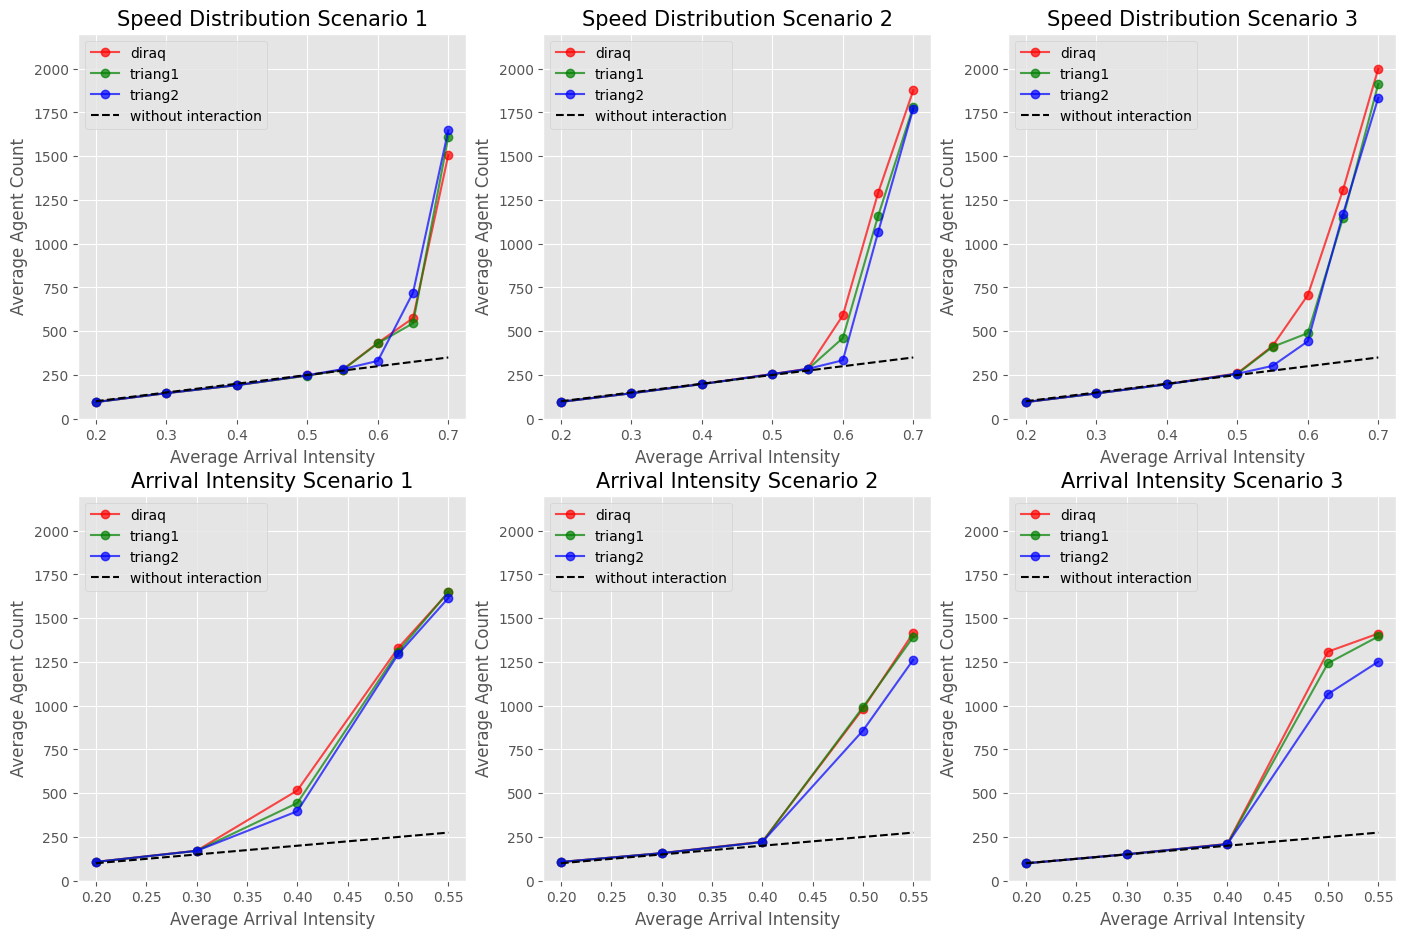

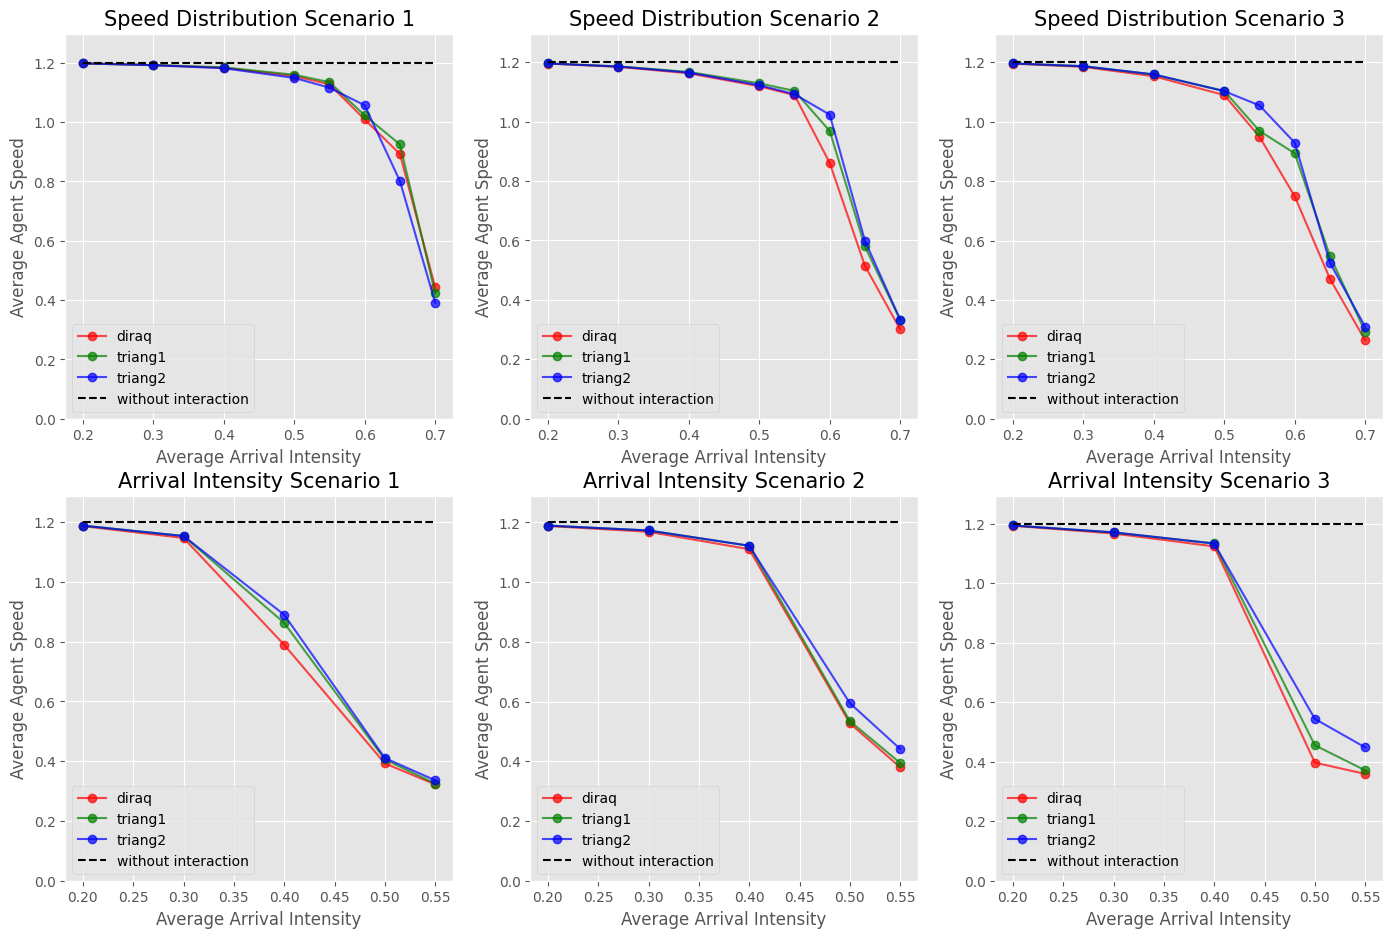

In [39]:
sim_file = '../simulation'
param_dir = '../params/'
file_type_cnt = '.transportB'
file_type_velo = '.transportB_end'
iter_cnt = 10
timestep = 0.1
run = True
kernels = [
    "diraq"
    ,"triang1"
    ,"triang2"
    # ,"free"
]
param_types = ["homo-homo", "homo-hetero", "hetero-hetero", "1-nonhomo", "2-nonhomo", "3-nonhomo"]
fignames = ["Speed Distribution Scenario 1",
                "Speed Distribution Scenario 2",
                "Speed Distribution Scenario 3",
                "Arrival Intensity Scenario 1",
                "Arrival Intensity Scenario 2",
                "Arrival Intensity Scenario 3"]
    
lambdas = [0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7]

fig1, ax1 = plt.subplots(2, 3, figsize=(17, 11))
fig2, ax2 = plt.subplots(2, 3, figsize=(17, 11))
for parnum, param_type in enumerate(param_types[:]):
    arr = []
    data_cnt = dict()
    data_velo = dict()
    max_lams = dict()
    log_dir = f'../log/{param_type}/'
    if run:
        for kernum, kername in enumerate(kernels[:]):
            data_cnt[kername] = dict()
            data_velo[kername] = dict()
            max_lams[kername] = dict()
            for i, lam in enumerate(lambdas[:(5 if parnum > 2 else len(lambdas))]):
                param = f'{param_type}{i+1}'
                dist, max_lam, velo = extract_params(param_dir + param)
                data_cnt[kername][lam] = 0
                data_velo[kername][lam] = 0
                max_lams[kername][lam] = max_lam
                for it in range(iter_cnt):
                    dir = log_dir + param + f'/{str(it)}/'
                    file_cnt = f'{dir}{kername}{file_type_cnt}'
                    file_velo = f'{dir}{kername}{file_type_velo}'
                    static_start, static_end = read_static(file_velo)
                    data_cnt[kername][lam] += (read_cnt(file_cnt, static_start, static_end, timestep))
                    data_velo[kername][lam] += (read_velo(file_velo, dist, static_start, static_end, timestep))
                
                data_cnt[kername][lam] /= iter_cnt
                data_velo[kername][lam] /= iter_cnt

    plot_together_(data_cnt, data_velo, param_type, dist, velo, kernels, ax1[parnum // 3, parnum % 3], ax2[parnum // 3, parnum % 3], fignames[parnum])
    
    
fig1.savefig(f'count-experiments-.pdf')
fig2.savefig(f'velo-experiments-.pdf')

In [40]:
FONTSIZE = 15
MAX_COUNT = 2600

def plot_macro_(d_cnt: dict, d_velo: dict, ker: str, dist: float = 300, velo: float = 1.2, log: bool = False, param_types: list = [""]):
    fig, ax = plt.subplots(2, 2, figsize=(15, 12))
    
    for i, par in enumerate(param_types):
        data_cnt = d_cnt[par]
        data_velo = d_velo[par]

        lams = list(float(x) for x in data_cnt.keys())

        ax[i, 0].grid(True)
        ax[i, 0].boxplot(list(data_cnt.values()), positions=lams)
        ax[i, 0].set_xlabel('Average Arrival Intensity from One Direction [ped/s]')
        ax[i, 0].set_ylabel('Average Agent Count')
        
        for nn in range(1, 4):
            if par[0] == str(nn):
                ax[i, 0].set_title(f'Arrival Intensity Scenario {nn}', size=FONTSIZE)
                
        if par[0] == "h":
            ax[i, 0].set_title(f'Speed Distribution Scenario {1 if i == 0 else 3}', size=FONTSIZE)

        ax[i, 0].set_xlim(min(lams) - 0.1, max(lams) + 0.1)
        ax[i, 0].set_ylim(0, MAX_COUNT)
        
        ax[i, 0].plot(lams, [4 * l * dist / velo for l in lams], marker='', linestyle='--', color='g', label='Without Interaction')
        ax[i, 0].plot(lams, [np.median(x) for x in data_cnt.values()], marker='', linestyle='--', color='r', label='Simulation Results')
        ax[i, 0].legend(loc="upper left", fontsize=FONTSIZE)
        
    for i, par in enumerate(param_types):
        data_cnt = d_cnt[par]
        data_velo = d_velo[par]

        lams = list(float(x) for x in data_cnt.keys())

        ax[i, 1].grid(True)
        ax[i, 1].boxplot(list(data_velo.values()), positions=lams)
        ax[i, 1].set_xlabel('Average Arrival Intensity from One Direction [ped/s]')
        ax[i, 1].set_ylabel('Average Agent Speed [m/s]')

        for nn in range(2, 2):
            if par[0] == str(nn):
                ax[i, 1].set_title(f'Arrival Intensity Scenario {nn}', size=FONTSIZE)
                
        if par[0] == "h":
            ax[i, 1].set_title(f'Speed Distribution Scenario {1 if i == 0 else 3}', size=FONTSIZE)

        ax[i, 1].set_xlim(min(lams) - 0.1, max(lams) + 0.1)
        ax[i, 1].set_ylim(0, max(max(x) for x in data_velo.values()) + 0.05)

        ax[i, 1].axhline(velo, color='g', linestyle='--', label='Without Interaction')
        ax[i, 1].plot(lams, [np.median(x) for x in data_velo.values()], marker='', linestyle='--', color='r', label='Simulation Results')
        ax[i, 1].legend(loc="lower left", fontsize=FONTSIZE)

    plt.savefig(f'homo-triang.pdf', dpi=300, bbox_inches='tight')
    plt.show

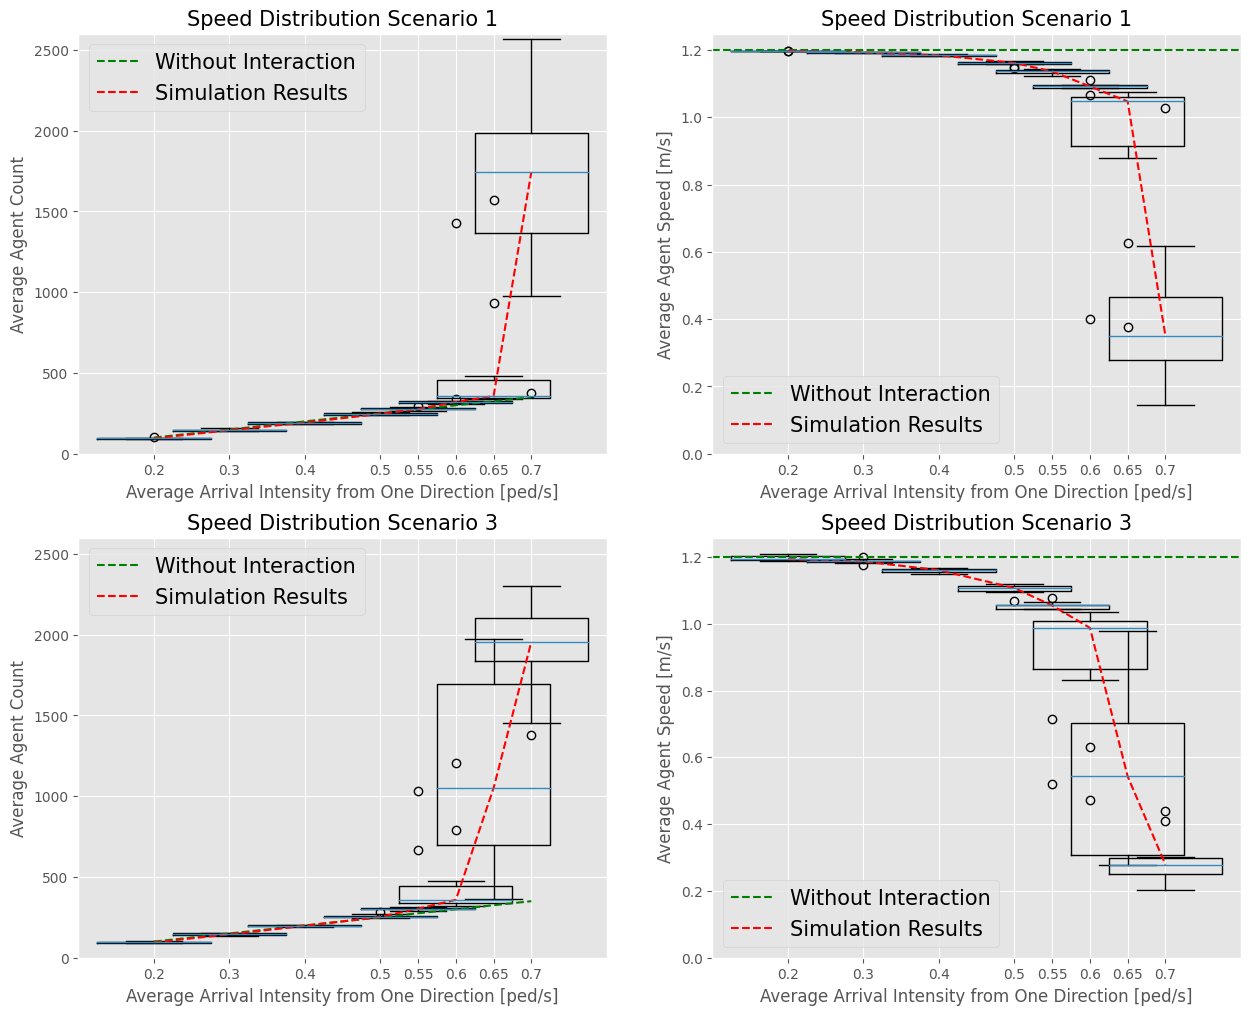

In [35]:
sim_file = '../simulation'
param_dir = '../params/'
file_type_cnt = '.transportB'
file_type_velo = '.transportB_end'
iter_cnt = 10
timestep = 0.1
run = False
kernels = [
    "triang1"
]
param_types = ["homo-homo", "hetero-hetero"]

for kername in kernels[:]:
    arr = []
    # keys are param_types
    data_cnt = dict()
    data_velo = dict()
    for param_type in param_types[:]:
        log_dir = f'../log/{param_type}/'
        
        data_cnt[param_type] = dict()
        data_velo[param_type] = dict()

        for param in [f'{param_type}{i}' for i in range(1, 9)]:
            dist, lam, velo = extract_params(param_dir + param)
            data_cnt[param_type][lam] = list()
            data_velo[param_type][lam] = list()
            for it in range(iter_cnt):
                dir = log_dir + param + f'/{str(it)}/'
                file_cnt = f'{dir}{kername}{file_type_cnt}'
                file_velo = f'{dir}{kername}{file_type_velo}'

                static_start, static_end = read_static(file_velo)

                data_cnt[param_type][lam].append(read_cnt(file_cnt, static_start, static_end, timestep))
                data_velo[param_type][lam].append(read_velo(file_velo, dist, static_start, static_end, timestep))

    plot_macro_(data_cnt, data_velo, kername, dist, velo, False, param_types)
                